In [4]:
#libraries 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal
from astroML.resample import jackknife
from astroML.stats import sigmaG
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

In [5]:
M_data= np.array([5.189148323710621,5.456451853389487,5.737084161490981,5.790762689979481,5.888065021860861,5.964669994794763,6.0317637540201945,5.965407972235508,5.943840790930368,
6.055483852913131,6.099690284600123,6.215029523000862,6.378833216604002,6.831597988844853,6.88270334144654,7.037574076745823,7.090311024734824,
7.038384745731345,6.986689720221476,7.078071149671165,7.332310487291596,7.318091698137167,7.386027103610799,7.497330015091062,
8.257298746642654,8.683167503671624,9.546422661178557,10.151266164056729,10.71414363598026])#and this is in log units i.e 10^(M_data)Solar M

Z_data= np.array([7.555416715578969,7.710564730437598,7.770089461292543,7.813804219079663,7.764507679027072,7.683109824319121,7.748052827915152,
7.841131028692265,7.957604120542158,8.024829276291836,7.830018005043833,8.058568515540001,8.103819775392811,7.984875150832128,8.024172681533493,
8.001557775189031,8.05789004927978,8.154671017794406,8.223697505793018,8.229404453965968,8.269758332760778,8.154467945526626,8.103060626768919,
8.252242520450855,8.32154228501783,8.576300340850914,8.77061488396522,9.051756845779114,9.27660201615495] )#Funky Units 12+log(Z_data/Z_Stellar)
Z_err = np.full_like(Z_data, 0.1)


In [8]:
def Z_model(M):
    Z0=8.8#add errorbars
    gamma =0.513
    m0=10 # 8.8 + 0.35[log(M*/M⊙) - 10]
    return 1.7/5.6*(M)+6 #chose a siimple linear model

# Chi-Squared for Original Data ---
print(Z_model(M_data))
chi2 = np.sum(((Z_data - Z_model(M_data)) / Z_err) ** 2)
dof = len(M_data) - 1  # Degrees of freedom
reduced_chi2 = chi2 / dof

print(f"Chi-squared: {chi2:.2f}")
print(f"Reduced Chi-squared: {reduced_chi2:.2f}")


'''
Chi^2 values are close to the 29 input values so that is good
chose this technique because it HUBER method seems like it would be good
if there was a obvious outlier... Which is not this case. We know gernerally 
that there is a one to one 

NEED TO GET CITATIONS 
'''

[7.57527717 7.65642288 7.74161483 7.7579101  7.78744831 7.81070339
 7.83107114 7.81092742 7.80438024 7.83827188 7.85169169 7.88670539
 7.93643151 8.07387796 8.08939209 8.13640642 8.15241585 8.13665251
 8.12095938 8.14870017 8.22587997 8.22156355 8.2421868  8.27597518
 8.50667998 8.63596156 8.89802117 9.08163437 9.25250789]
Chi-squared: 28.68
Reduced Chi-squared: 1.02


'\nChi^2 values are close to the 29 input values so that is good\nchose this technique because it HUBER method seems like it would be good\nif there was a obvious outlier... Which is not this case. We know gernerally \nthat there is a one to one \n\nNEED TO GET CITATIONS \n'

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
/var/folders/9_/5x2g4jmx5fxb62v465flw5980000gp/T/ipykernel_20581/3808837250.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.axvline(chi2, color='r', linestyle='--', label=f'Original $\chi^2$ = {chi2:.2f}')


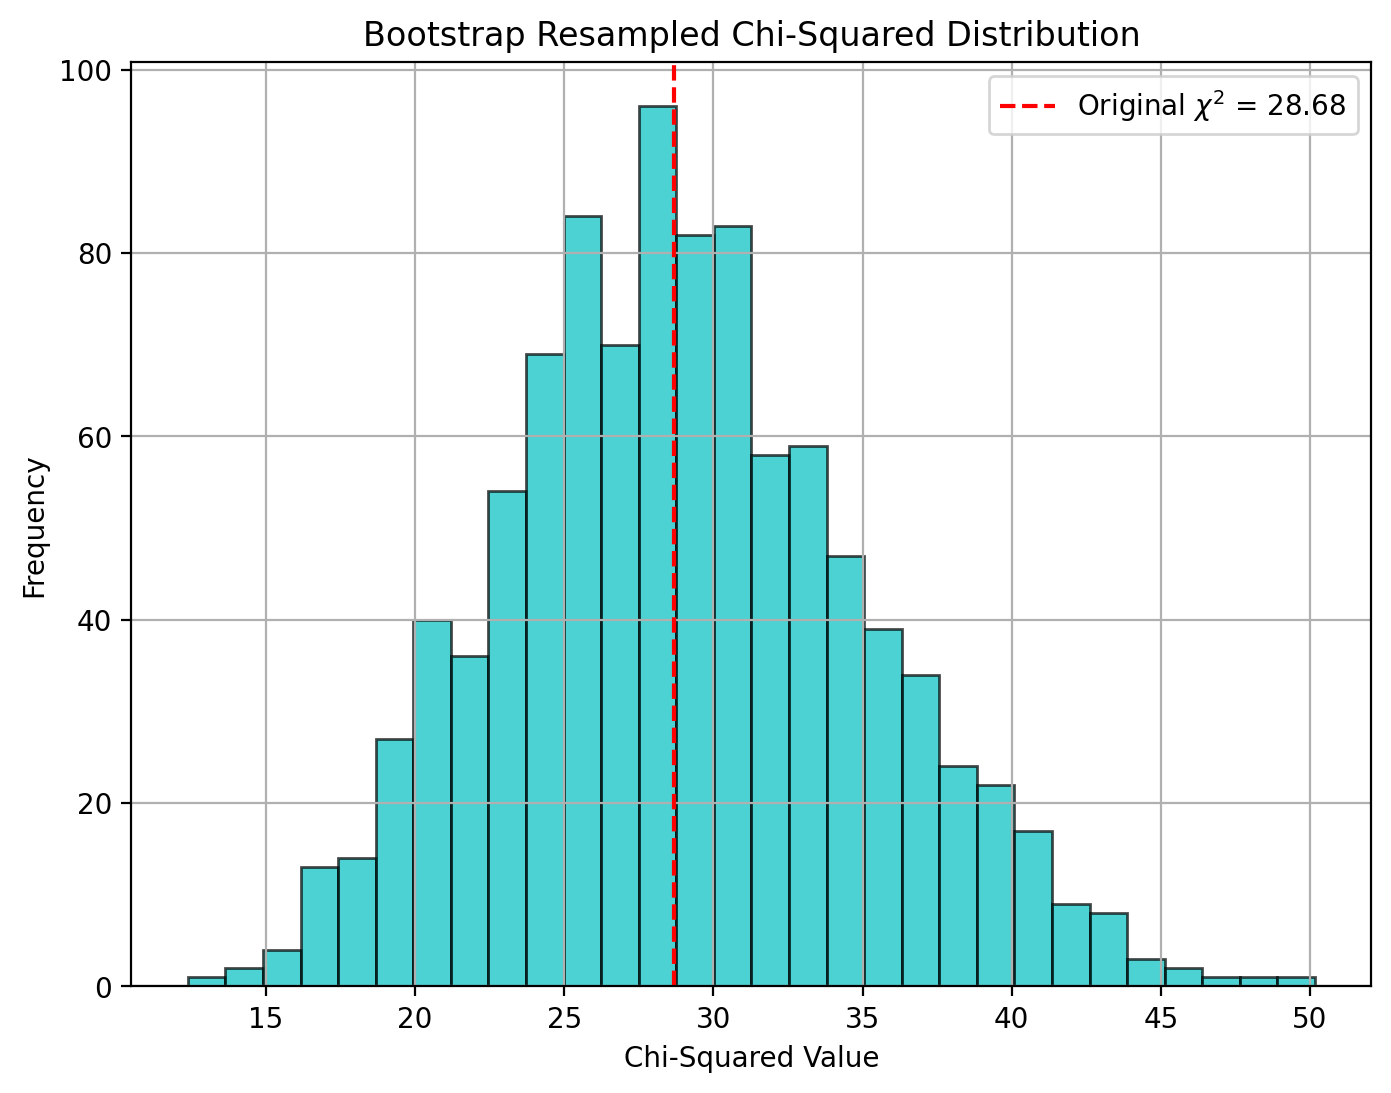

'\nthis figure shows a relatively gaussian distribution, showing that the chi2 \nfitting is relatively accurate\n\n\n'

In [10]:

n_boot = 1000  # Number of bootstrap iterations
chi2_boot = np.zeros(n_boot)

for i in range(n_boot):
    resample_idx = np.random.choice(len(M_data), size=len(M_data), replace=True)
    M_boot = M_data[resample_idx]
    Z_boot = Z_data[resample_idx]
    Z_err_boot = Z_err[resample_idx]
    
    chi2_boot[i] = np.sum(((Z_boot - Z_model(M_boot)) / Z_err_boot) ** 2)

# ---- Plotting Chi-Squared Distribution ----
plt.figure(figsize=(8, 6))
plt.hist(chi2_boot, bins=30, color='c', edgecolor='k', alpha=0.7)
plt.axvline(chi2, color='r', linestyle='--', label=f'Original $\chi^2$ = {chi2:.2f}')
plt.xlabel('Chi-Squared Value')
plt.ylabel('Frequency')
plt.title('Bootstrap Resampled Chi-Squared Distribution')
plt.legend()
plt.grid(True)
plt.show()
'''
this figure shows a relatively gaussian distribution, showing that the chi2 
fitting is relatively accurate


'''

In [11]:
from scipy.optimize import curve_fit


def Z_model(M, a, b): 9
    return a * M + b
params, covariance = curve_fit(Z_model, M_data, Z_data, sigma=Z_err, absolute_sigma=True)

# Extract best-fit values and uncertainties
a_fit, b_fit = params
a_err, b_err = np.sqrt(np.diag(covariance))
print(a_err)

0.013848996960948275


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/9_/5x2g4jmx5fxb62v465flw5980000gp/T/ipykernel_20581/1618583998.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(M_fit, Z_lower, Z_upper, color='r', alpha=0.3, label="1$\sigma$ Confidence Band")


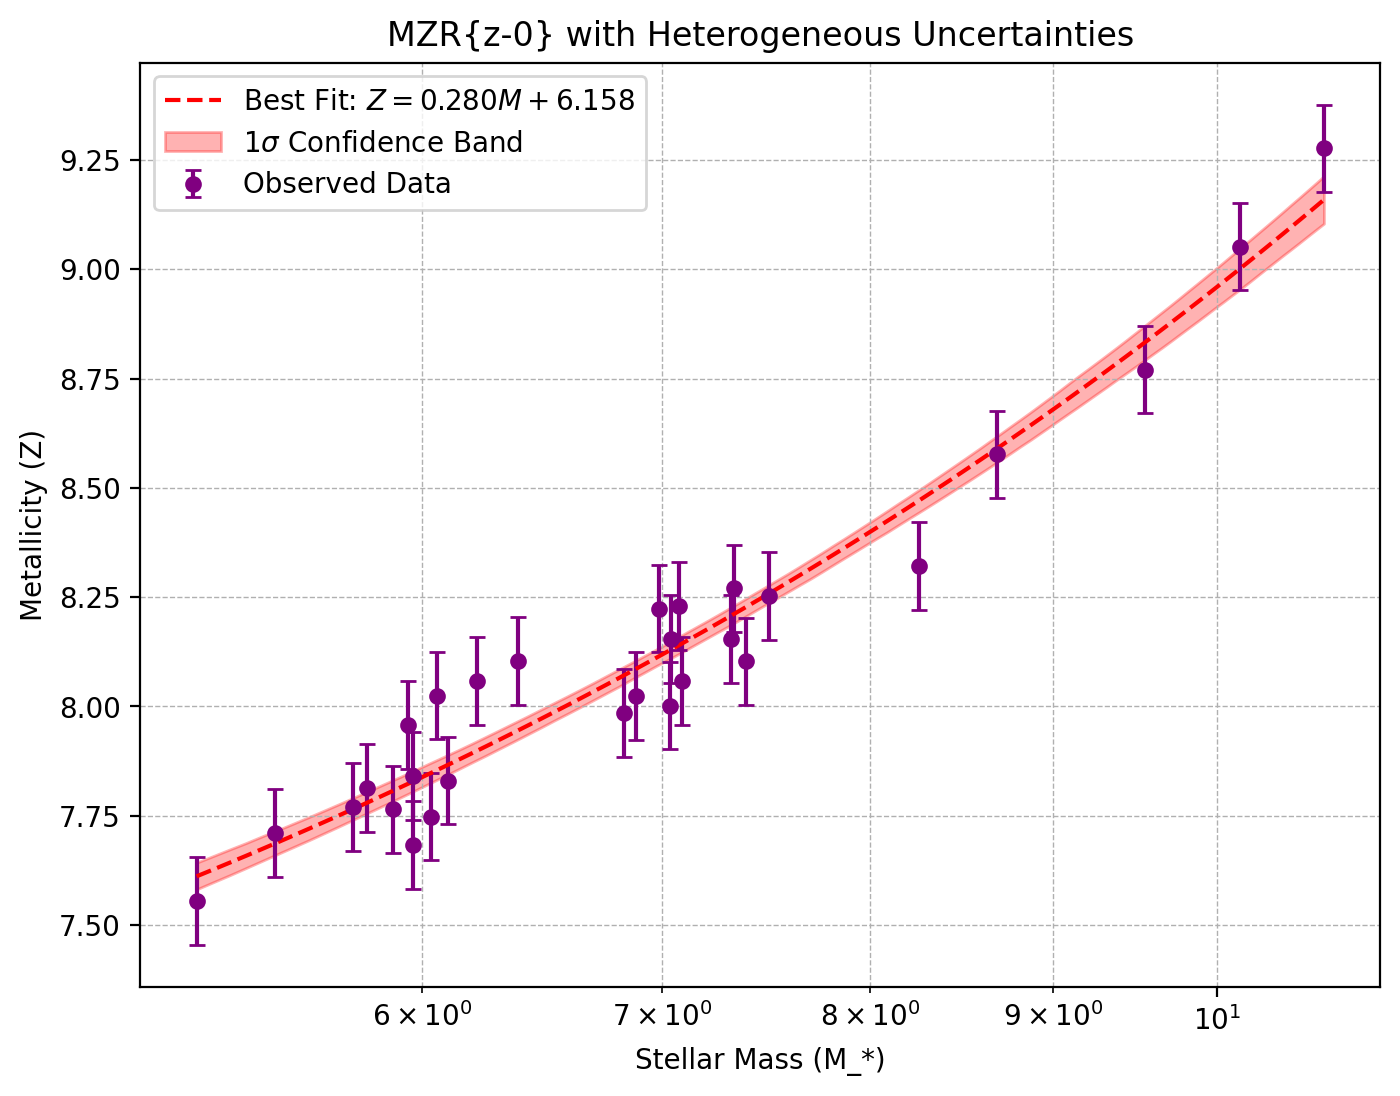

'\nUsed MCMC to estimated the hetergeneous unsertain\n'

In [14]:
M_fit = np.linspace(min(M_data), max(M_data), 100)  # 100 points for smooth curve
Z_fit = Z_model(M_fit, a_fit, b_fit)  # Best-fit metallicity values

# Monte Carlo Sampling to get confidence intervals
n_samples = 1000  # Number of Monte Carlo samples
param_samples = np.random.multivariate_normal([a_fit, b_fit], covariance, size=n_samples)

Z_samples = np.array([Z_model(M_fit, a, b) for a, b in param_samples])
Z_lower = np.percentile(Z_samples, 16, axis=0)  # 1-sigma lower bound
Z_upper = np.percentile(Z_samples, 84, axis=0)  # 1-sigma upper bound

# Plot the observed data with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(M_data, Z_data, yerr=Z_err, fmt='o', label="Observed Data", color='purple', capsize=3, markersize=5)

# Plot the best-fit model
plt.plot(M_fit, Z_fit, label=f"Best Fit: $Z = {a_fit:.3f} M + {b_fit:.3f}$", color='r', linestyle='--')

# Confidence band
plt.fill_between(M_fit, Z_lower, Z_upper, color='r', alpha=0.3, label="1$\sigma$ Confidence Band")

# Labels and grid
plt.xscale('log')  
plt.xlabel('Stellar Mass (M_*)')
plt.ylabel('Metallicity (Z)')
plt.title("MZR{z-0} with Heterogeneous Uncertainties")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

'''
Used MCMC to estimated the hetergeneous unsertain
'''

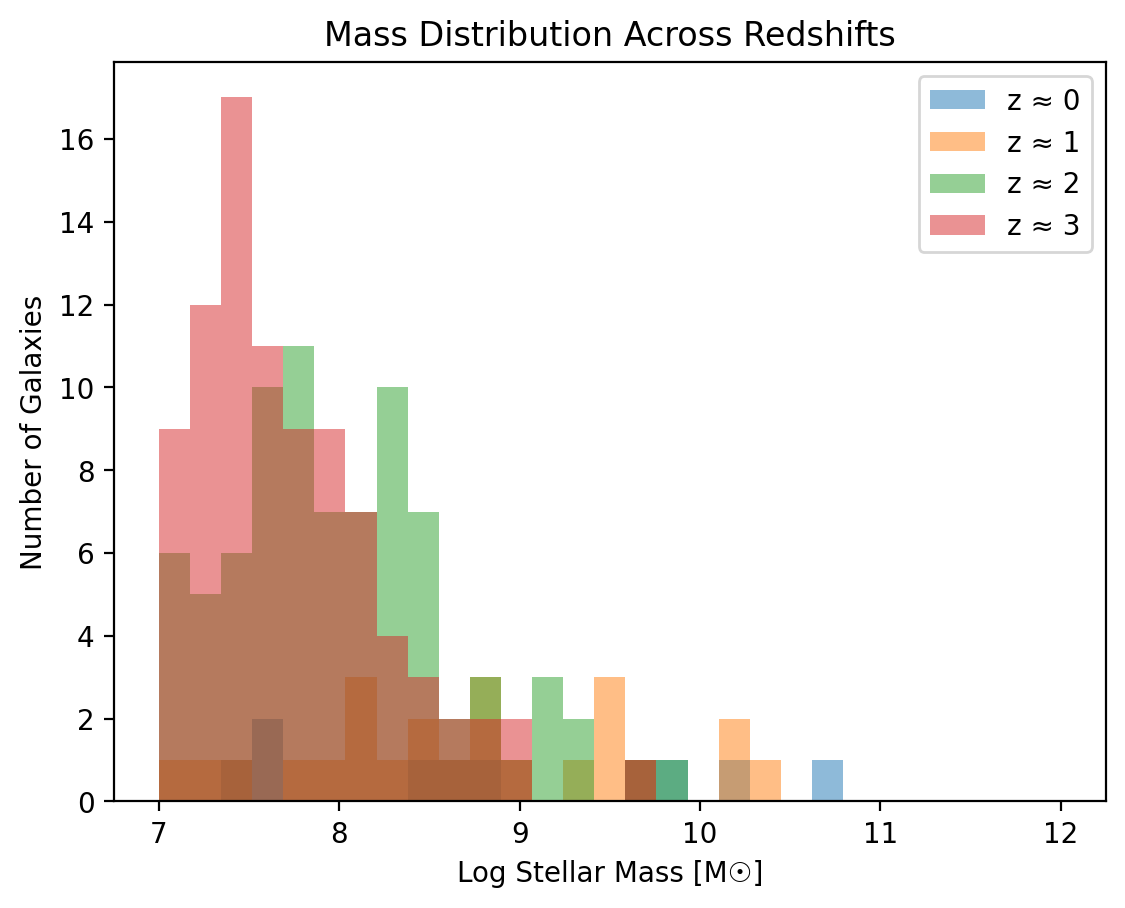

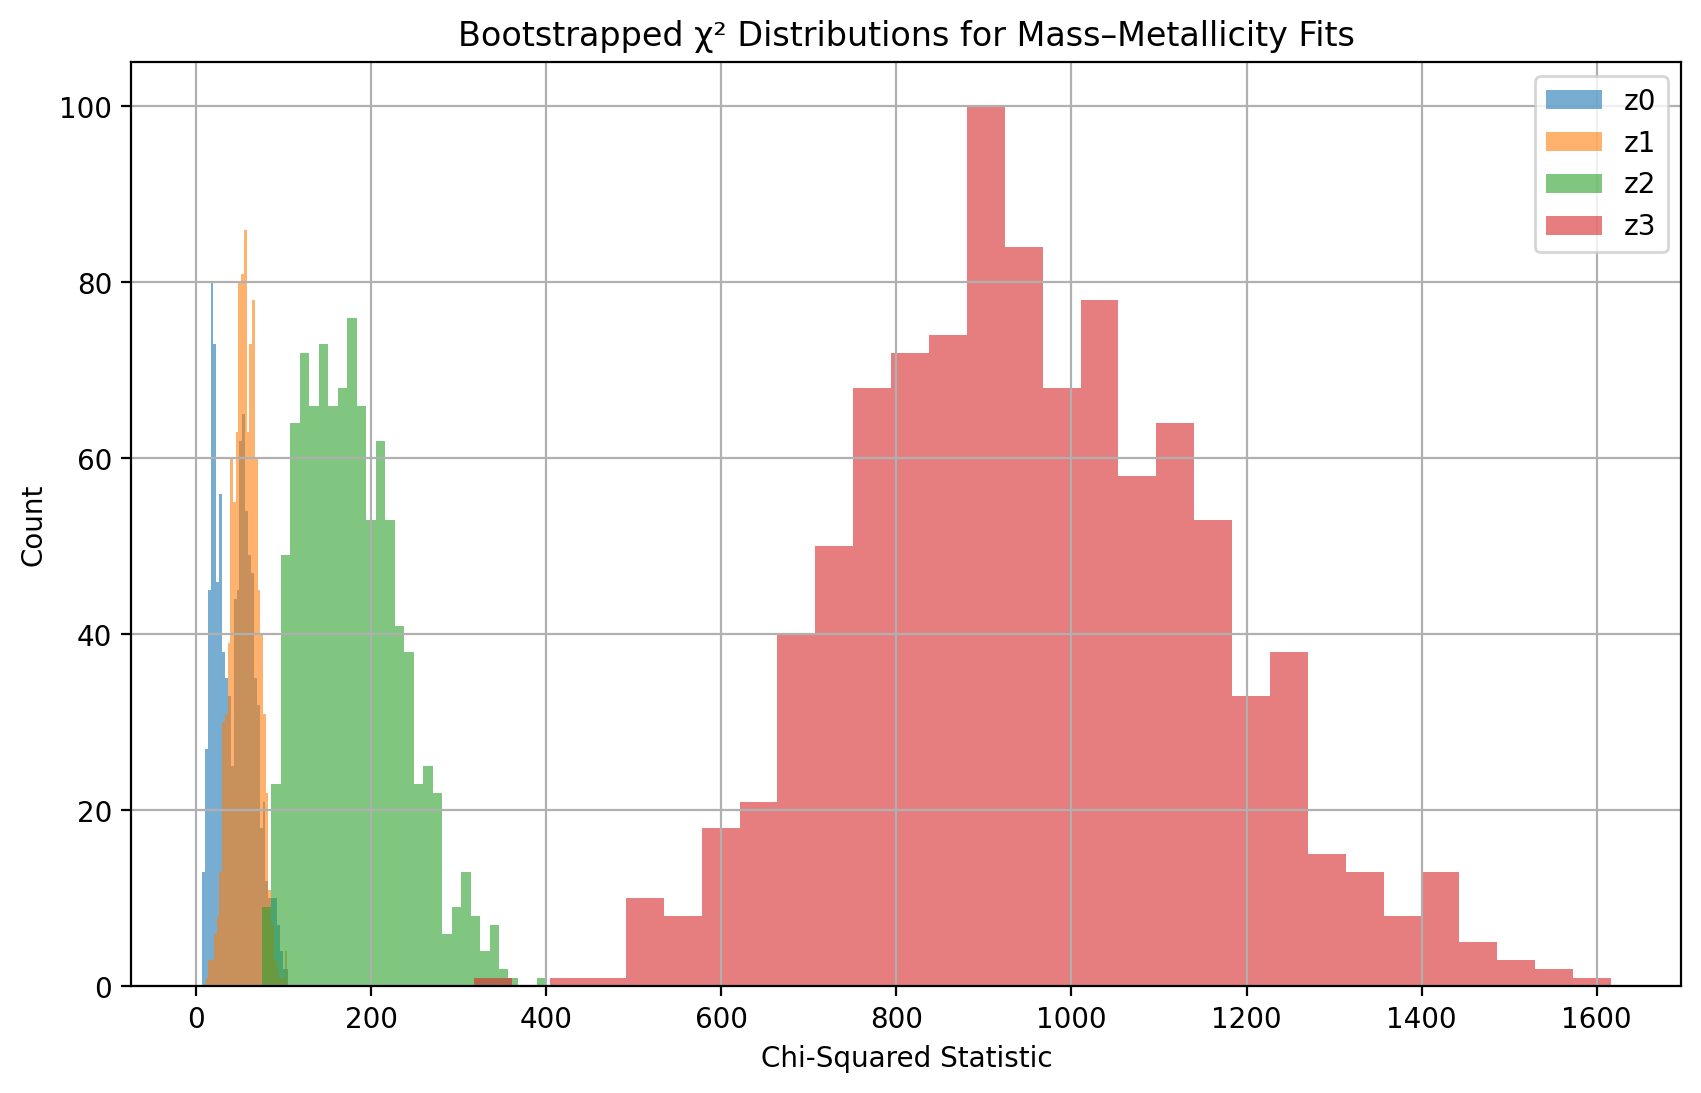

In [122]:
mZ0=np.array([5.732236209821023,5.9444518224245416,4.63900062926022,7.417437670941506,7.536631773761349 ,7.612449530399777,
              8.552916006889259,8.446592568635413,8.83936800844711,9.650501711008378 ,10.174923417349447,9.80456344899926
              ,10.640466443865007 ])
zZ0=np.array([7.362394426680545,7.671595744887809, 7.837249152397264,7.70289938151926,7.971667760848821, 8.116491698829535, 8.34858209461156,
  8.478593858793166,  8.262817848060557, 8.492043659573536, 8.742913609818558, 8.856459094024766, 8.985837251007021])


mZ1=np.array([5.914920874890904 ,6.42669840488378 ,7.011789163578599,7.339226451192587,
7.477545400817021,8.007394350482551 ,7.826732623497911, 8.175248495057716 ,8.175248495057716 ,8.329323559000095 ,
8.09088614510896  ,8.381324516637095  ,8.433650122437422,8.610439607878796,8.790935023932521 ,8.809191368605367,
8.736392685324617, 9.531759497718994, 9.671189596167467,9.531759497718994,9.297397127899965 ,8.975214055771275 
,9.472620799430548 ,10.270891893462329,10.143838145781896 ,10.421133983414533 ])

zZ1=np.array([ 7.4624721865397055,7.728081382223848, 7.39908643559986, 7.597355303364859,  7.754495294053686, 7.969082738522885,
 7.747883364333574, 8.02365110151417, 8.016809674036278, 7.941937883720869,8.154753215150043,8.106205052395525,
  8.22461253640144,  8.273869843048532, 8.252723548647088,  8.337634386101605,  8.430607278171198,  8.47386681656394,
  8.495579755494392,  8.561052958645538, 8.330525238374715, 8.147800002452268, 8.835564367791198,  8.934089672967678, 9.064590082619503,
 9.041422871368711])

mZ2=np.array([5.807350449677521 ,6.2315467682826595 ,6.803039163224746 , 7.106911017279848 ,7.106168288124999 ,7.210490671923489 ,7.135565194283377 ,
7.165000505187001, 7.017194538676675 ,6.987717250251798, 7.031224469772595,7.255047924759732, 7.4397182823179975 , 7.856556237882417 ,
7.2088999279406885, 7.345416641867537 ,7.330121337982069, 7.330291583615599 ,7.484692438023597 , 7.484822814361978, 7.579197701380149,
7.674272379254724 ,7.4532945965282416,7.562449517904272 ,7.56231778940491 ,7.60957934308619,7.530463140536694,7.530463140536694, 7.468239813434249,
7.641724291484299, 7.737673167031918, 7.70561674623249, 7.689794643667249,7.83555466495209,7.901618266610906 , 8.01775794459652,8.324398449672318 ,8.53475175511403 ,8.341138819947373 ,8.322851905688651,
8.218835385047425 , 8.133620922936386 ,8.184452899663297 , 8.150166926685666,8.08258840718454,7.704990395524621 , 7.6409256700563954 ,
7.641058767831481 ,7.785397736678098 ,7.721247240689713,7.884020279850638 , 7.818875551883681,8.08432500248947  ,7.9837530674686,
8.06683530983115,7.999483261036838 ,7.8835167487122915,7.899691575182719,7.736190708689184,7.736190708689184,8.479626761373389,8.3047979617181,8.270728148246452 ,8.150924119429238 ,
8.515447028485424,8.427255101793037,8.48031608348176 ,8.676655767288603 ,8.87779891857183,8.766795932857288,8.33891128273557 ,
8.304171122995783 , 8.235506920261475,8.821072814675889,9.025092223020355,9.234420100137998 ,9.19578904120457 ,9.234527336464625,
9.389647168403448 ,9.646726589590916,9.828324709171701 ,9.250519473343104 ,8.25106239653967  ,8.566874375517404 ,8.532125724862194,
8.532422970743223])

zZ2= np.array([ 7.409447747029659,7.823474021416112, 7.599796786444932, 7.683978428146436, 7.802538690020461, 7.822364925829585, 7.849106152887684
,  7.909396372048876, 7.90955656736595, 7.956827200623948,  8.01111104476598,  7.929510193113506,7.788928436303535,7.432519020507999
,  8.079351936292165,  8.079221028628197, 8.051777358351835,  8.031093139282916, 8.024199379678613
 , 8.003715687856504, 8.017262823903925, 8.05141859601775,  8.092846792540731, 8.15492663819914, 8.17576420230567, 8.203580623476526,
  8.2386302778088,8.189785006473064, 8.147910079473235,   8.1617178101867,  8.127094126141754, 8.10623284376867,
 8.037504441594516,   8.023435577352526, 8.09178145270513, 8.112638406564276, 8.175068759763219,8.244839878129318,
 8.329533884392164,8.329618236313763,8.357958115415023,  8.393616344452346,  8.379416295284793, 8.25949770743105, 8.273628593883663,
 8.252541602875528,8.30874192897271,  8.23142499787776,  8.203431088054797, 8.210279281804418, 8.16160209812959,8.119789044386806,
  8.133713855481508, 8.217083264611047, 8.273259946543634,  8.287464733459256, 8.329854426238715,  8.415421732987252,  8.415489910274024,
  8.36478283114632,  8.350733040378014, 8.280032271754832, 8.280149662869418,  8.30801834840976,  8.29397990944094, 8.265756518085547, 8.314937010463145,
  8.32890970672062,8.421628128444064, 8.43637812519349, 8.44359179360263,  8.400674347142994, 8.522470048133927, 8.478962771425733,
 8.450161249873092, 8.602398774044199,8.631561842268882,  8.587584615373949, 8.609388214247833,  8.719716226546328,
 8.861631000639633, 9.044937334825843,8.64716989345196, 8.595519461600109,  8.464944076171212,  8.421849870060058])



mZ3=np.array([4.3201462482795465,5.336042071547728 ,5.681542408026005 ,6.574479585192804 , 6.574479585192804 ,6.639900349800481 ,
6.785204866489623,6.917226201337884,7.017761686389618 ,7.102475252897441,7.102759019353795 ,7.1195687300633566 ,7.034885497126287 ,
7.051957176331243,7.257902545409424 , 7.188594348071478 ,7.223670355669965 ,7.171812682024585,7.34566166318336,7.275418533231441 ,
7.345368192382219 ,7.345368192382219 ,7.416138528661969,7.505461114927218 , 7.469265489681237,7.433590900282679 ,7.362850126740693 ,7.309701256068125,7.452076703751147 ,
7.523875143324797 ,7.559882337259981 ,7.632922750135498 ,7.651445696761954  ,7.799646490352436 ,7.950664842482122,
8.008420836181953 ,7.6518023474478145 ,7.725627966489108 ,7.725370756419516, 7.506110841950741 ,7.6150023929118476,7.346248639961385 ,
7.363683636836099 ,7.346493227461908 ,7.453069197162842 ,7.346101891369765 ,7.506910583192378 ,7.597478227226521,7.543740706410488,7.597984139627637 ,7.5612416182478634,7.707643926436398 ,7.725885185122307,7.781541961896585,7.837547498202103 ,7.856723957111487,
7.951353109561792 ,7.9324738670497705,7.951617843533939,7.951988485902713 ,8.164405665362066 , 8.203860644073323 ,8.243341619127337 ,
8.322541976688608 ,8.3219878195441 ,8.463147071821648 ,8.524058275913427 ,8.301565201895054 ,7.577017059234829 ,7.9299917060197,
7.94791236987409  ,7.833477882381929,7.342678589647188,7.290160743545428 ,7.20330451932541 ,7.186871345890217 ,7.274062198353325,7.239368140708834,7.18730205771491,7.101813175253188,7.10200233399645,
8.751523747886027,8.12367978538572 ,7.416928683771579 ,7.971763436973576 ,8.145562935907888 ,8.04878327231053,8.16538428631273 ,8.087464087065857,
8.383390146486406, 8.587065901406781,8.648926568316634,8.794811512173286 ,8.901984028798644 ,8.96605364278483 ,9.683601270987088 
])


zZ3= np.array([  4.386268578648442,4.765270056165627,5.478737609469011,5.027643960203617, 5.5890027562828335,  5.7289432695588935, 5.912237514424316,
 6.006008077747032, 6.032965998431215,6.115057536383185, 6.046538713046658,6.087700299673673,  6.142767232058287, 6.184022706615588, 6.170240187062857
 ,6.324970369005317, 6.296640424269418, 6.253899188842507,6.211912275977306,6.169943772306504,6.169812036985567,6.1419147741515285,  6.059527380687237, 6.073257105462222, 6.128356949223936,  6.019006065603245, 6.253698898114691,
 6.253565374526504, 6.211381767383045, 6.183329549474049, 6.267467108431315,6.324160140363467, 6.33815114263495, 6.33788049204491,
 6.438505033605774,6.4246697289842745,6.453541257131885, 6.381263807727582,6.324430205044508, 6.367109663813192,6.425252751202853,
 6.3675854943017525,6.498028441822718,6.541879401983416,6.381979153488306,6.556527052914501, 6.571137349039923, 6.78177529785077,
6.72083646715167,  6.60087848456936,6.600596615043611, 6.526637357801799, 6.497196044443449,6.4533345725601725,  6.555862130293073,
 6.526219313322935,  6.570506016958169, 6.600138602735305,6.705034304469243,6.689554952314356,6.750029993479288,6.765179817130602,
 6.704354321156351,6.555022324418879, 6.6439693108797755, 6.5991169974927235, 6.423503843251207, 5.937728530966288,  5.9104389486109365,
5.637331480369042, 5.413504120356573, 5.450996434242831,5.475697011697786,5.475843155661346,5.689630329266827, 5.832214935275932, 5.858611689081753,
  5.806154057810495, 5.845679234868355,5.89858842594044,  6.524826025103673, 6.23842895710947, 6.396234636225021,6.904246751544238,
 6.888381032046575,  6.966588280087075, 6.966365164396388,  6.966513907396209,  6.919040942857408,  6.997036029790741, 6.965472773087579,
 6.840819713366248, 7.107860187791531,7.139763763127482,7.091564425227333,7.7939131222954146
])
import matplotlib.pyplot as plt

bins = np.linspace(7, 12, 30)  # Adjust as needed

plt.hist(mZ0, bins=bins, alpha=0.5, label="z ≈ 0", color=colors[0])
plt.hist(mZ1, bins=bins, alpha=0.5, label="z ≈ 1", color=colors[1])
plt.hist(mZ2, bins=bins, alpha=0.5, label="z ≈ 2", color=colors[2])
plt.hist(mZ3, bins=bins, alpha=0.5, label="z ≈ 3", color=colors[3])
plt.xlabel("Log Stellar Mass [M☉]")
plt.ylabel("Number of Galaxies")
plt.legend()
plt.title("Mass Distribution Across Redshifts")
plt.show()


import numpy as np
from sklearn.utils import resample
from scipy.stats import chisquare
import matplotlib.pyplot as plt

def chi_squared(y_true, y_pred, y_err):
    return np.sum(((y_true - y_pred) / y_err)**2)

def bootstrap_chi_squared(mass, metallicity, N=1000, model='linear'):
    chi2s = []
    y_err = np.full_like(metallicity, 0.1)  # assume constant error bar

    for _ in range(N):
        m_sample, Z_sample = resample(mass, metallicity)
        
        # Fit linear model: Z = a*mass + b
        coeffs = np.polyfit(m_sample, Z_sample, 1)
        Z_pred = np.polyval(coeffs, m_sample)
        
        chi2 = chi_squared(Z_sample, Z_pred, y_err)
        chi2s.append(chi2)
    
    return chi2s

# Run for each redshift slice
boot_chi2 = {
    'z0': bootstrap_chi_squared(mZ0, zZ0),
    'z1': bootstrap_chi_squared(mZ1, zZ1),
    'z2': bootstrap_chi_squared(mZ2, zZ2),
    'z3': bootstrap_chi_squared(mZ3, zZ3),
}

# 🎨 Plot the distributions
plt.figure(figsize=(10, 6))
for idx, (label, chi2s) in enumerate(boot_chi2.items()):
    plt.hist(chi2s, bins=30, alpha=0.6, label=f'{label}', color=colors[idx])

plt.xlabel("Chi-Squared Statistic")
plt.ylabel("Count")
plt.title("Bootstrapped χ² Distributions for Mass–Metallicity Fits")
plt.legend()
plt.grid(True)
plt.show()

'''
The reaso
'''


CRAZZYYY. So the reason why the chi-squared (χ2) values get so huge is either because I’m not clearing my iterator properly, or because the models at high redshift simply don’t follow a linear trend at all. It could also point to the need to scale for the expanding volume of the universe — which makes sense, since larger cosmic volumes should definitely impact how we fit these models.

This tells me we need more advanced fitting approaches for multiparameter relationships.

Ridge and Lasso regression are regularization methods that help constrain the coefficients in a model so it doesn’t become overly complex. Basically, we don’t want too many parameters — we want efficiency. Either of these methods could help track how the model evolves with redshift, especially since these histograms show that a constant model just doesn’t cut it.

We’ll likely need to bring in more advanced machine learning algorithms that can correlate changes in the mass-metallicity relation (MZR) as a function of redshift.

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
/var/folders/9_/5x2g4jmx5fxb62v465flw5980000gp/T/ipykernel_20581/3412024583.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Stellar Mass (log M$_*$/M$_\odot$)", fontsize=13)


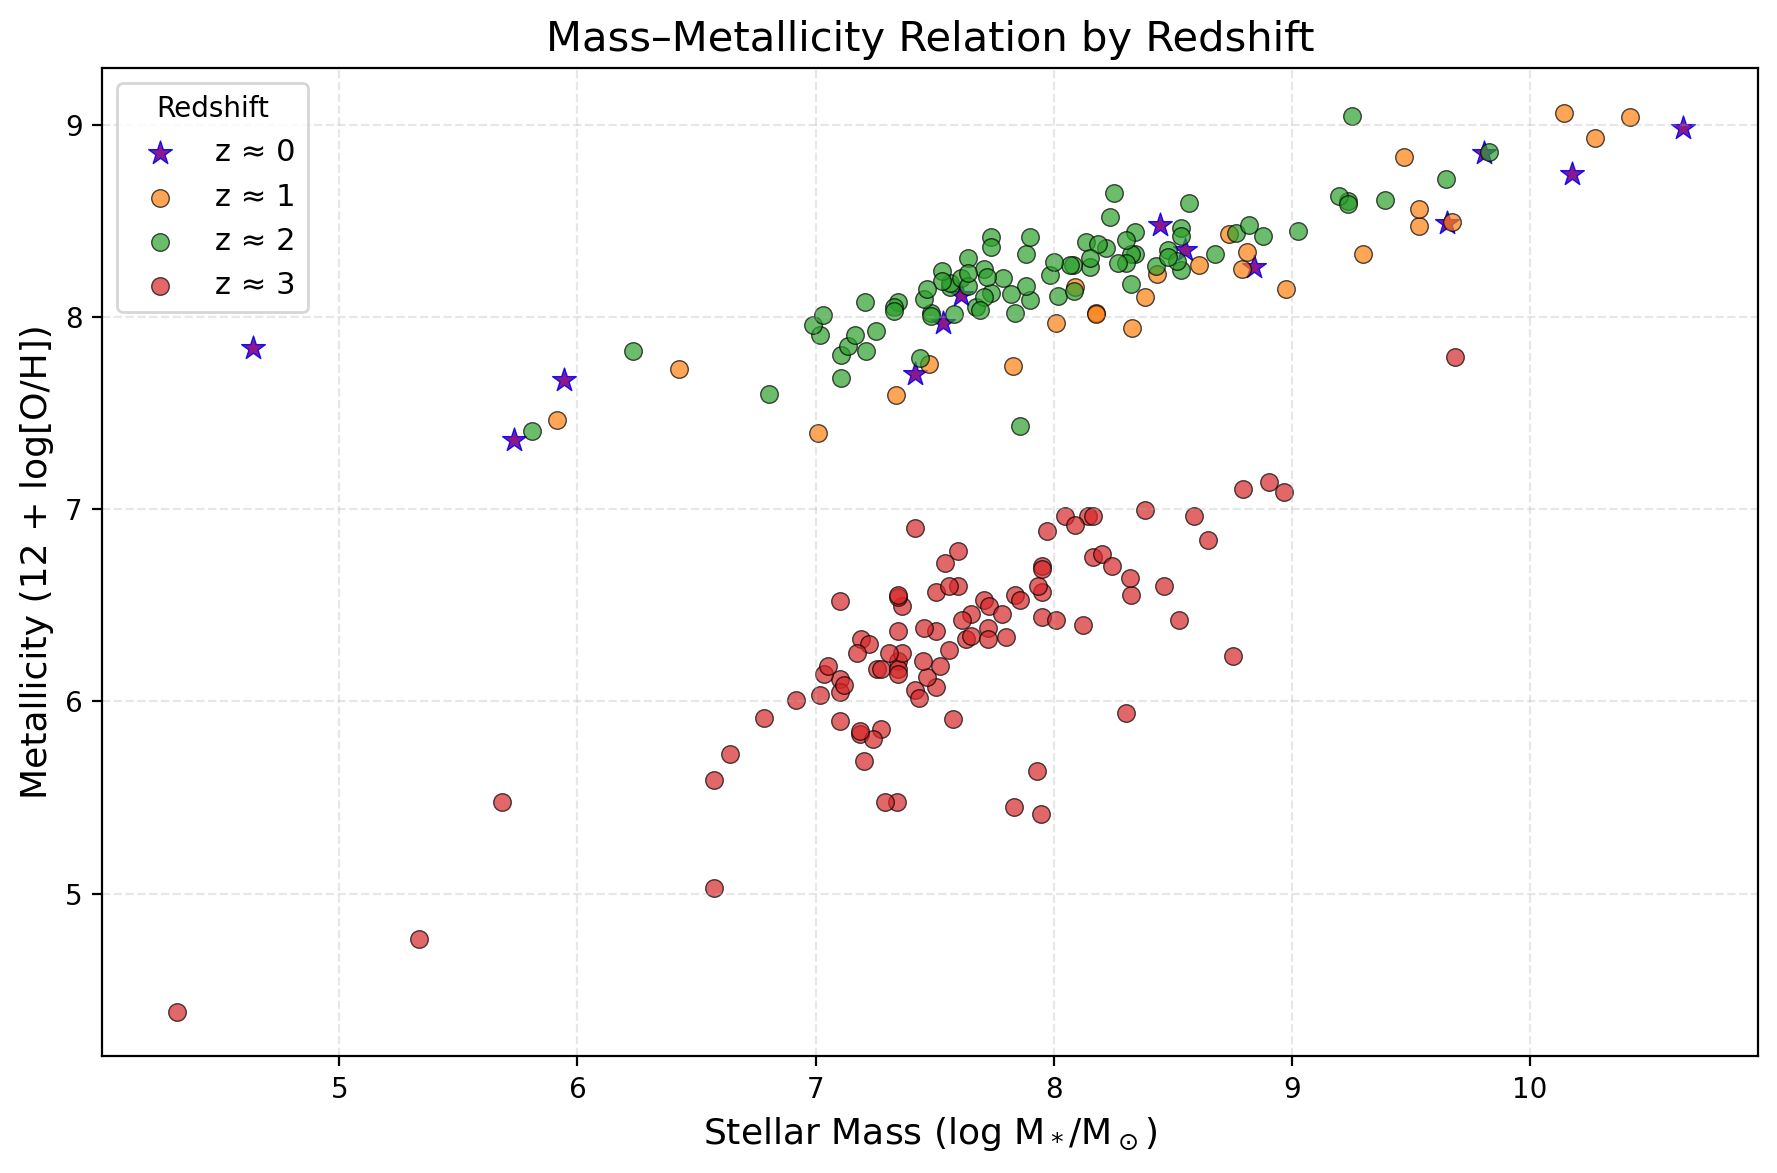

In [143]:
plt.figure(figsize=(9, 6))

# Use consistent colors from a pleasant palette (e.g., Set1 or tab10)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

plt.scatter(mZ0, zZ0, label="z ≈ 0", color="purple", s=80, alpha=0.9, edgecolor='b', linewidth=0.5, marker="*")
plt.scatter(mZ1, zZ1, label="z ≈ 1", color=colors[1], s=40, alpha=0.7, edgecolor='k', linewidth=0.5)
plt.scatter(mZ2, zZ2, label="z ≈ 2", color=colors[2], s=40, alpha=0.7, edgecolor='k', linewidth=0.5)
plt.scatter(mZ3, zZ3, label="z ≈ 3", color=colors[3], s=40, alpha=0.7, edgecolor='k', linewidth=0.5)

plt.xlabel("Stellar Mass (log M$_*$/M$_\odot$)", fontsize=13)
plt.ylabel("Metallicity (12 + log[O/H])", fontsize=13)
plt.title("Mass–Metallicity Relation by Redshift", fontsize=15)

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Redshift", fontsize=11)
plt.tight_layout()
plt.show()


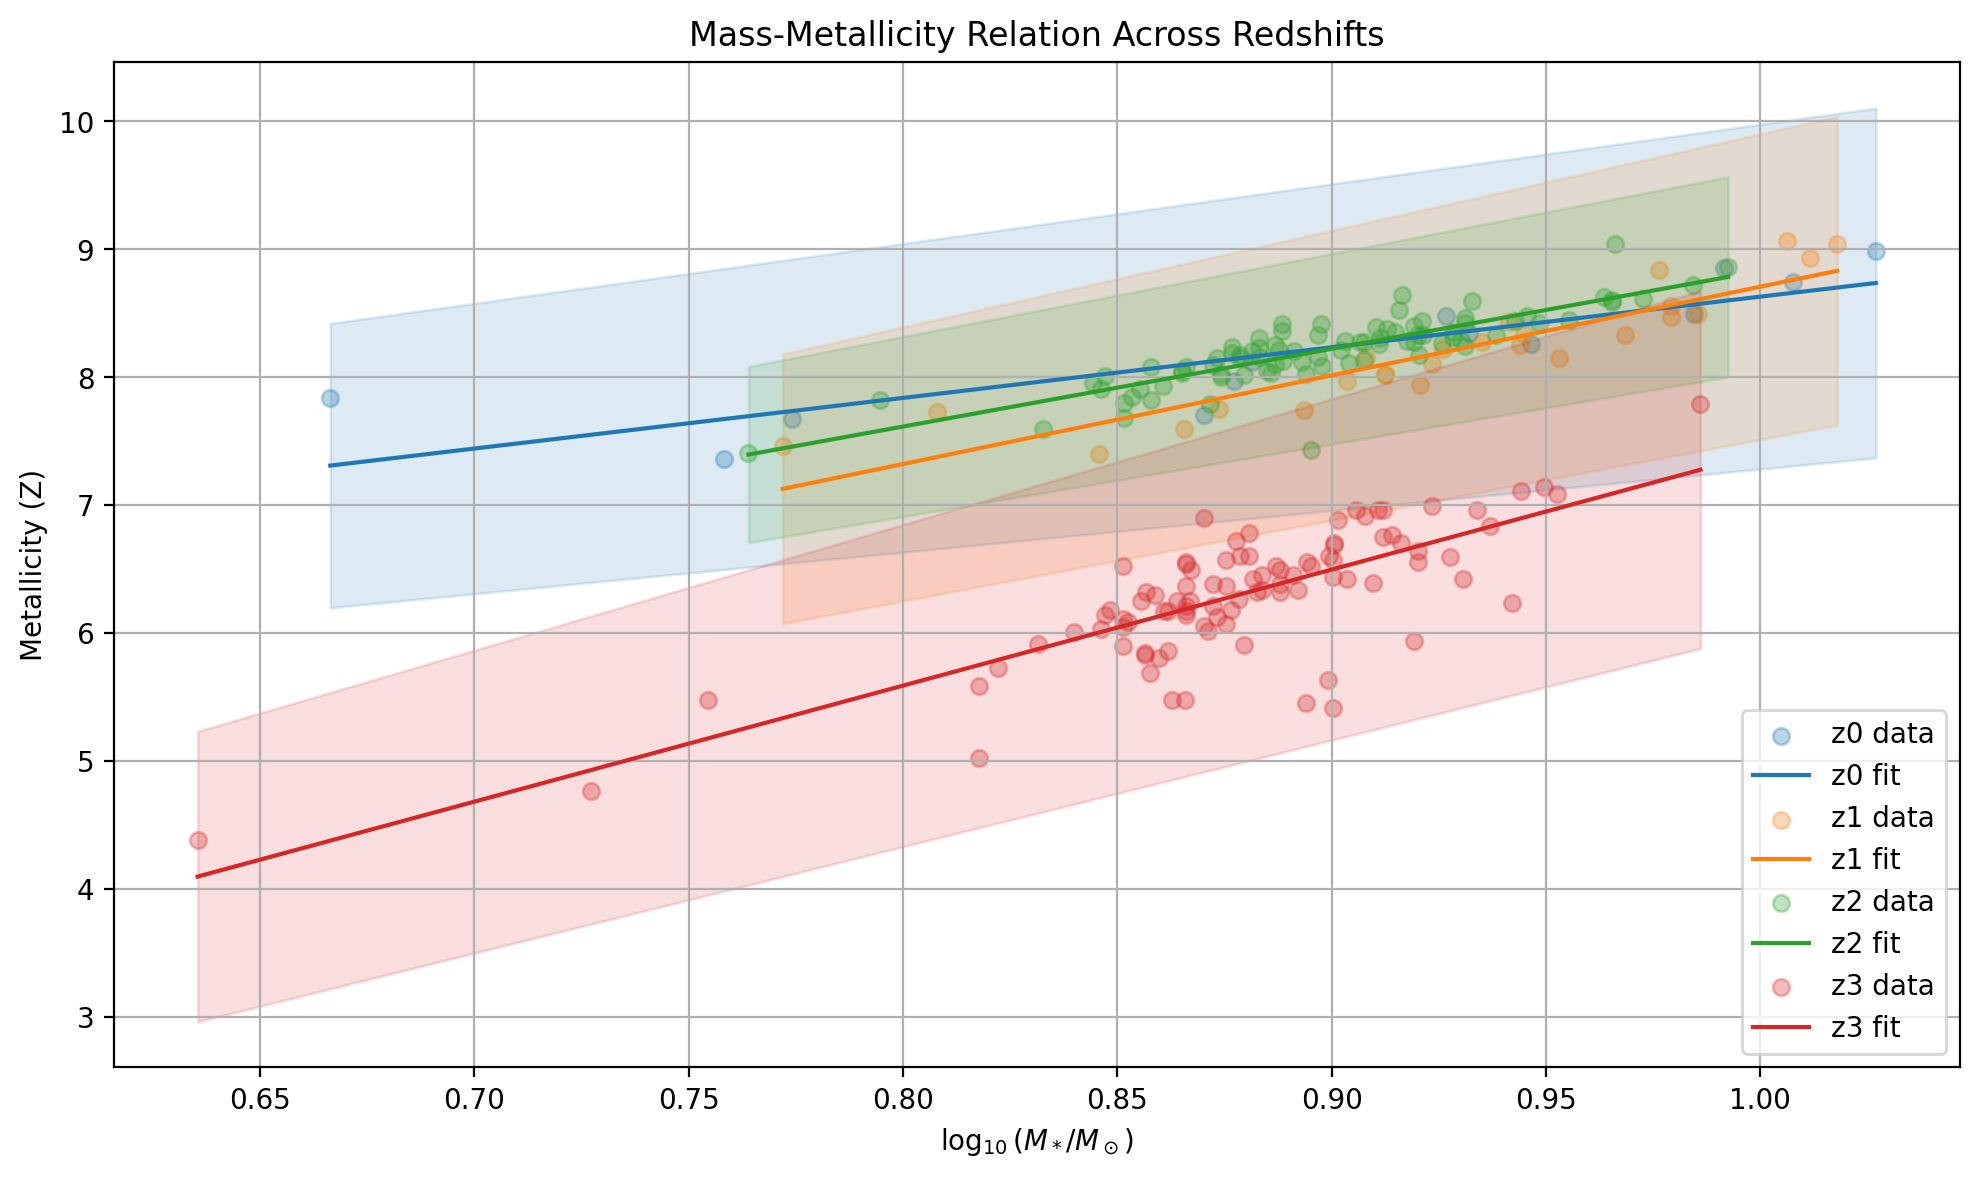

In [20]:
redshift_bins = {
    'z0': (mZ0, zZ0),
    'z1': (mZ1, zZ1),
    'z2': (mZ2, zZ2),
    'z3': (mZ3, zZ3),
}
def linear_model(x, a, b):
    return a * x + b #this is the same as Zmodel

plt.figure(figsize=(10, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, (label, (masses, metallicities)) in enumerate(redshift_bins.items()):
    logM = np.log10(masses)
    Z = metallicities

    # Fit the model
    popt, pcov = curve_fit(linear_model, logM, Z)
    a, b = popt
    perr = np.sqrt(np.diag(pcov))

    # Generate line and error band
    x_fit = np.linspace(min(logM), max(logM), 100)
    y_fit = linear_model(x_fit, *popt)

    # 1-sigma confidence interval
    y_upper = linear_model(x_fit, *(popt + perr))
    y_lower = linear_model(x_fit, *(popt - perr))

    # Plot the data and fit
    plt.scatter(logM, Z, alpha=0.3, color=colors[i], label=f'{label} data')
    plt.plot(x_fit, y_fit, color=colors[i], label=f'{label} fit')
    plt.fill_between(x_fit, y_lower, y_upper, color=colors[i], alpha=0.15)

# Labels and legend
plt.xlabel(r'$\log_{10}(M_*/M_\odot)$')
plt.ylabel(r'Metallicity (Z)')
plt.title('Mass-Metallicity Relation Across Redshifts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The top panel displays the adjusted linear fits across different redshifts, while the bottom panel presents the corresponding χ² estimations. The analysis remains incomplete, as further work is required to estimate the parameter densities and/or perform parameter optimization. The goal is to determine the evolving values of slope (a) and intercept (b) that best align the redshift-evolving model (zmodel) with the data such that the resulting χ² values fall within the highest confidence region—defined here as being within the observational uncertainty ranges.


In [5]:

# Number of bootstrap iterations
n_boot = 1000
chi2_boot = np.zeros(n_boot)

# Loop through each redshift bin
for i, (z_key, (mZ, zZ)) in enumerate(redshift_bins.items()):
    # Assuming M_data, Z_data, Z_err are your mass, metallicity, and metallicity errors for each redshift bin
    M_data = mZ  # Replace with actual mass data
    Z_data = zZ  # Replace with actual metallicity data
    Z_err = 0.1 * Z_data  # Example error, replace with actual error model for each redshift

    # Bootstrap to calculate chi^2 distribution
    for j in range(n_boot):
        resample_idx = np.random.choice(len(M_data), size=len(M_data), replace=True)
        M_boot = M_data[resample_idx]
        Z_boot = Z_data[resample_idx]
        Z_err_boot = Z_err[resample_idx]
        
        chi2_boot[j] = np.sum(((Z_boot - Z_model(M_boot)) / Z_err_boot) ** 2)

    # Plotting for each redshift bin
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the histogram of chi^2 values (fit quality)
    ax[0].hist(chi2_boot, bins=30, color='skyblue', edgecolor='black')
    ax[0].set_title(f"Bootstrap Histogram of $\chi^2$ at {z_key}")
    ax[0].set_xlabel("$\chi^2$")
    ax[0].set_ylabel("Frequency")

    # Plot the MZR with heteroscedastic errors
    ax[1].errorbar(M_data, Z_data, yerr=Z_err, fmt='o', color='red', label=f'MZR at {z_key}')
    ax[1].set_title(f"Mass-Metallicity Relation at {z_key}")
    ax[1].set_xlabel("Mass (log M/M$_\odot$)")
    ax[1].set_ylabel("Metallicity (log Z/Z$_\odot$)")
    ax[1].legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\o'
<>:34: SyntaxWarning: invalid escape sequence '\o'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\o'
<>:34: SyntaxWarning: invalid escape sequence '\o'
/var/folders/9_/5x2g4jmx5fxb62v465flw5980000gp/T/ipykernel_10363/3613379210.py:26: SyntaxWarning: invalid escape sequence '\c'
  ax[0].set_title(f"Bootstrap Histogram of $\chi^2$ at {z_key}")
/var/folders/9_/5x2g4jmx5fxb62v465flw5980000gp/T/ipykernel_10363/3613379210.py:27: SyntaxWarning: invalid escape sequence '\c'
  ax[0].set_xlabel("$\chi^2$")
/var/folders/9_/5x2g4jmx5fxb62v465flw5980000gp/T/ipykernel_10363/3613379210.py:33: SyntaxWarning: invalid escape sequence '\o'
  ax[1].set_xlabel("Mass (log M/M$_\odot$)")
/var/folders/9_/5x2g4jmx5fxb62v465flw5980000gp/T/ipykernel_10363/36133

NameError: name 'redshift_bins' is not defined

For the sake of this project, I will not be editing this line. However this will be a summer task! 

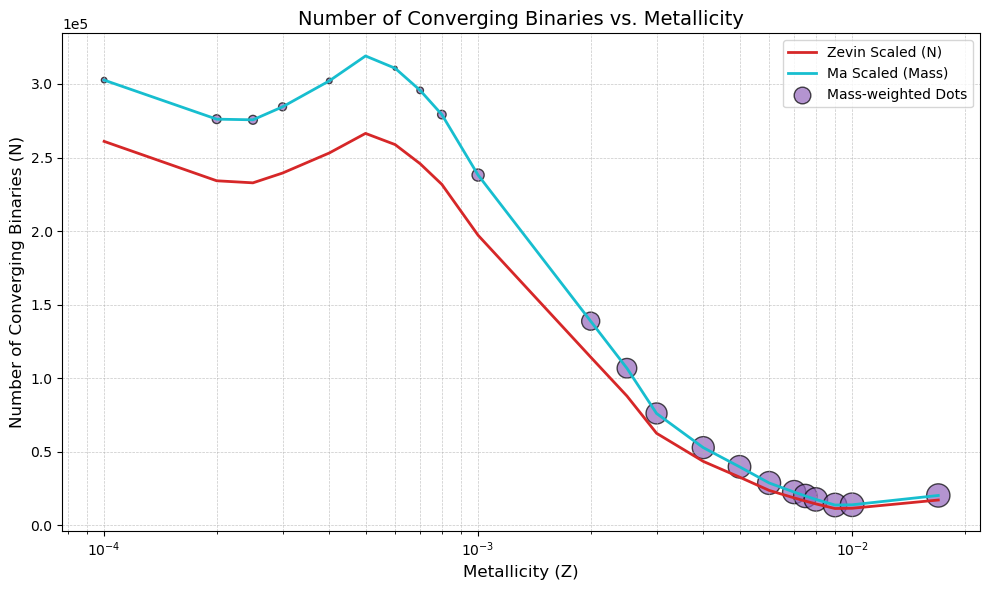

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Data
z = [0.0001, 0.0002, 0.00025, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
     0.001, 0.002, 0.0025, 0.003, 0.004, 0.005, 0.006, 0.007, 0.0075, 0.008,
     0.009, 0.01, 0.017]

zMa = z  # Assuming same z values for mass-weighted

nibMZR = [260966.77566573687, 234189.16826765682, 232788.15813636818,
          239437.02602974809, 253074.0271485923, 266384.6731579955,
          258776.02629850002, 245759.2687882441, 231728.95812930426,
          197152.29479530003, 114342.75425549534, 87909.42436309373,
          62596.42342404276, 43478.31888494594, 32791.83184772258,
          23764.316433062126, 18675.588278427098, 16507.932288446053,
          14580.049745496479, 11463.375623486174, 11621.205971748783,
          17227.911280052744]

nibMZRMa = [302607.3554476585, 276062.4473256052, 275622.7333228553,
            284437.8855462418, 302072.5523981326, 319014.68178656517,
            310668.0589758457, 295608.3333254863, 279162.4809361133,
            238061.075034093, 138772.12801059635, 106782.94239599208,
            76063.38056792917, 52825.302735546386, 39808.74774137151,
            28813.546010466092, 22608.604119406256, 19967.1839760065,
            17619.14357410158, 13825.429060249473, 13985.562048721518,
            20317.67844819783]

# Size scaling by metallicity-dependent mass function
mass_scaling =(1 - np.array(nibMZRMa) / max(nibMZRMa)) * 300   # Adjust scale factor

# Plot
plt.figure(figsize=(10, 6))

# Line plots
plt.plot(z, nibMZR, label=r'Zevin Scaled (N)', color='tab:red', linewidth=2)
plt.plot(zMa, nibMZRMa, label=r'Ma Scaled (Mass)', color='tab:cyan', linewidth=2)

# Scatter with size scaled by mass function
plt.scatter(z, nibMZRMa, s=mass_scaling, color='tab:purple', alpha=0.7, edgecolors='k', label='Mass-weighted Dots')

# Log-scaled x-axis
plt.xscale('log')
plt.xticks([1e-4, 1e-3, 1e-2], labels=['$10^{-4}$', '$10^{-3}$', '$10^{-2}$'])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Labels and formatting
plt.xlabel('Metallicity (Z)', fontsize=12)
plt.ylabel('Number of Converging Binaries (N)', fontsize=12)
plt.title('Number of Converging Binaries vs. Metallicity', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


The plot above illustrates the results from my research conducted at Los Alamos National Laboratory (LANL). This serves as an empirical prior, providing valuable intuition for how metallicity influences binary system formation. Specifically, it demonstrates a clear anti-correlation between the number of interacting binary systems within a galaxy and the galaxy’s overall metallicity. In lower-metallicity environments, we observe a higher incidence of such systems, reinforcing the notion that metallicity plays a pivotal role in compact binary formation pathways.

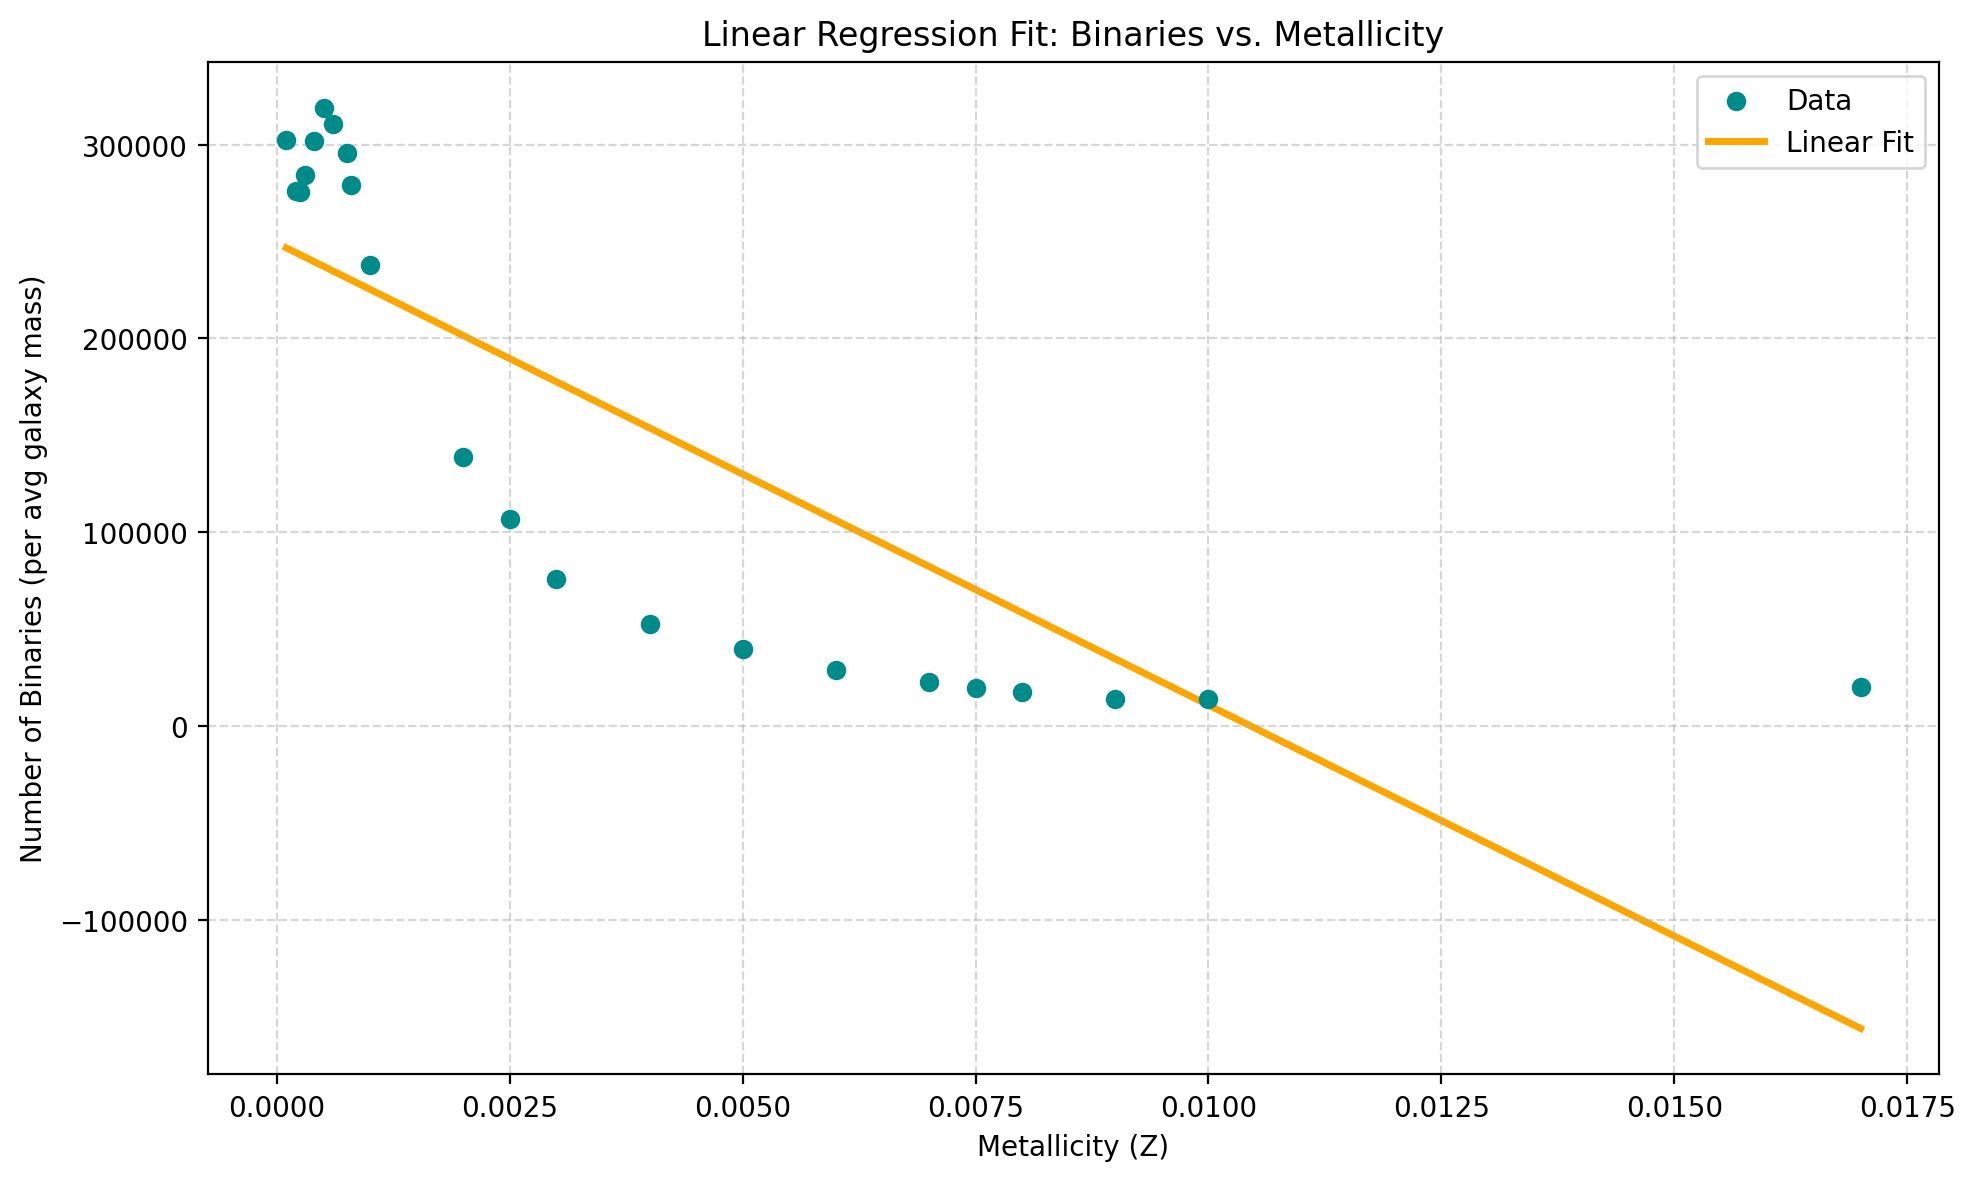

Linear Model: N = -2.38e+07 * Z + 2.49e+05


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
zMa = np.array([0.0001,0.0002,0.00025,.0003,.0004,.0005,.0006,.00075,.0008,
                .001,.002,0.0025,.003,.004,.005,.006,.007,.0075,.008,.009,.01,.017]).reshape(-1, 1)
# the negative value may come from this reshape... look more into this 
nibMZRMa = np.array([302607.36,276062.45,275622.73,284437.89,302072.55,
                     319014.68,310668.06,295608.33,279162.48,238061.08,
                     138772.13,106782.94,76063.38,52825.30,39808.75,
                     28813.55,22608.60,19967.18,17619.14,13825.43,
                     13985.56,20317.68])

# Linear Regression
model = LinearRegression()
model.fit(zMa, nibMZRMa)

# Prediction line
z_fit = np.linspace(min(zMa), max(zMa), 100).reshape(-1, 1)
nib_fit = model.predict(z_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(zMa, nibMZRMa, color='darkcyan', label='Data', zorder=2)
plt.plot(z_fit, nib_fit, color='orange', linewidth=2.5, label='Linear Fit', zorder=1)

plt.xlabel("Metallicity (Z)")
plt.ylabel("Number of Binaries (per avg galaxy mass)")
plt.title("Linear Regression Fit: Binaries vs. Metallicity")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Print model equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Model: N = {slope:.2e} * Z + {intercept:.2e}")


It is immediately evident from the plot that the relationship between the number of interacting binary systems and metallicity is not linear. This deviation from linearity indicates that further physical intuition is required to fully understand this relationship. Notably, the mass-metallicity relation—illustrated in the earlier plots—is reasonably well-described by a linear fit. If we accept that there exists a relatively direct, one-to-one relationship between galaxy mass and metallicity, it would follow that the number of binaries as a function of mass should map closely onto the number of binaries as a function of metallicity.

However, this is not what our simulation results reveal. This disconnect suggests one of two possibilities: either the simulation—despite its high-dimensional sophistication—is not accurately modeling reality, which is unlikely given its rigorous design, or we are fundamentally missing key insights into how metallicity influences stellar evolution, galaxy formation, and, by extension, cosmic evolution. This underscores the need for deeper theoretical and observational work to resolve the complex role metals play in shaping the universe.

In [48]:
# Assume a constant error for simplicity
y_err = np.ones_like(nibMZRMa) * np.std(nibMZRMa) * 0.1  # 10% std deviation

# Predicted values
nib_pred = model.predict(zMa)

# Chi-squared calculation
chi_squared = np.sum(((nibMZRMa - nib_pred) / y_err) ** 2)
dof = len(nibMZRMa) - 2  # degrees of freedom: n - number of fitted params

print(f"Chi-squared: {chi_squared:.2f}")
print(f"Reduced Chi-squared (χ²/dof): {chi_squared/dof:.2f}")

Chi-squared: 734.73
Reduced Chi-squared (χ²/dof): 36.74


In [50]:
from sklearn.metrics import mean_squared_error

n = len(zMa)
slopes = []
intercepts = []
errors = []

for i in range(n):
    # Leave one point out
    z_jack = np.delete(zMa, i, axis=0)
    nib_jack = np.delete(nibMZRMa, i)
    
    model_jack = LinearRegression().fit(z_jack, nib_jack)
    y_pred_jack = model_jack.predict(z_jack)
    mse = mean_squared_error(nib_jack, y_pred_jack)
    
    slopes.append(model_jack.coef_[0])
    intercepts.append(model_jack.intercept_)
    errors.append(mse)

# Analyze variation
slope_std = np.std(slopes)
intercept_std = np.std(intercepts)
mean_error = np.mean(errors)

print(f"Jackknife std dev of slope: {slope_std:.2e}")
print(f"Jackknife std dev of intercept: {intercept_std:.2e}")
print(f"Mean squared error across jackknife samples: {mean_error:.2f}")


Jackknife std dev of slope: 2.33e+06
Jackknife std dev of intercept: 6.94e+03
Mean squared error across jackknife samples: 5144558060.87


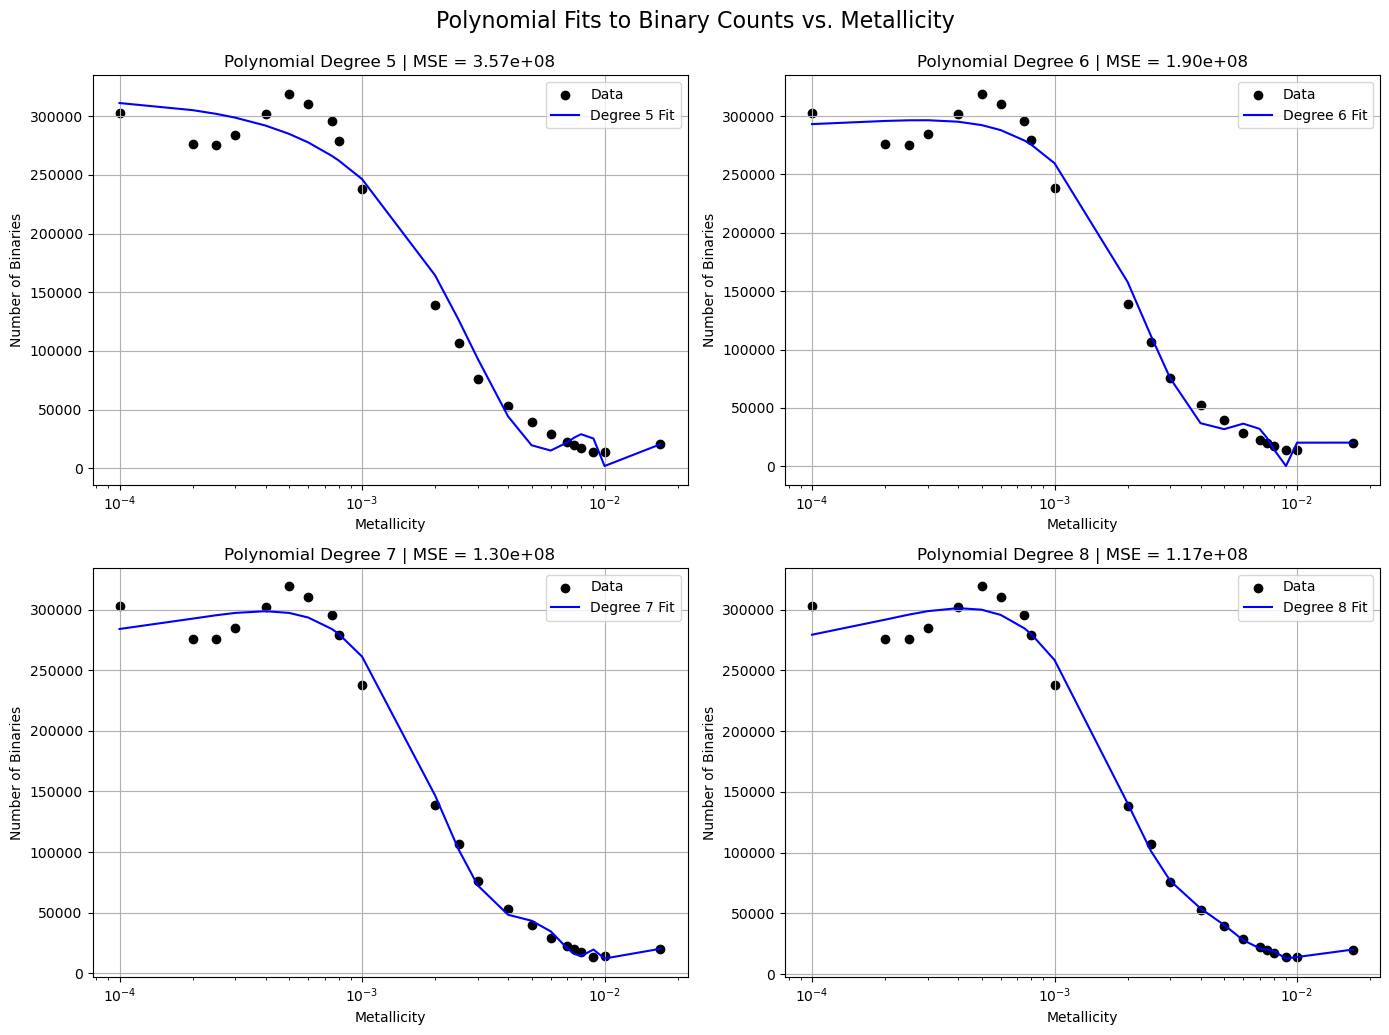

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


zMa = np.array([0.0001,0.0002,0.00025,.0003,.0004,.0005,.0006,.00075,.0008,.001,
                .002,0.0025,.003,.004,.005,.006,.007,.0075,.008,.009,.01,.017])
nibMZRMa = np.array([302607.35,276062.45,275622.73,284437.89,302072.55,319014.68,
                     310668.06,295608.33,279162.48,238061.08,138772.13,106782.94,
                     76063.38,52825.30,39808.75,28813.55,22608.60,19967.18,17619.14,
                     13825.43,13985.56,20317.68])

# Set up figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
degrees = [5, 6, 7,8]
axs = axs.ravel()

# Fit and plot each polynomial
for i, deg in enumerate(degrees):
    coeffs = np.polyfit(zMa, nibMZRMa, deg=deg)
    poly = np.poly1d(coeffs)
    y_fit = poly(zMa)
    mse = mean_squared_error(nibMZRMa, y_fit)

    axs[i].scatter(zMa, nibMZRMa, color='black', label="Data")
    axs[i].plot(zMa, y_fit, label=f"Degree {deg} Fit", color='blue')
    axs[i].set_xscale('log')
    axs[i].set_xlabel("Metallicity")
    axs[i].set_ylabel("Number of Binaries")
    axs[i].set_title(f"Polynomial Degree {deg} | MSE = {mse:.2e}")
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.suptitle("Polynomial Fits to Binary Counts vs. Metallicity", fontsize=16, y=1.03)
plt.savefig("nvZ")

The MSE is lowest at the highest degree polynomial. This leads me to beleive that the highest fit degree would be ininitely high... lets see using BIC!

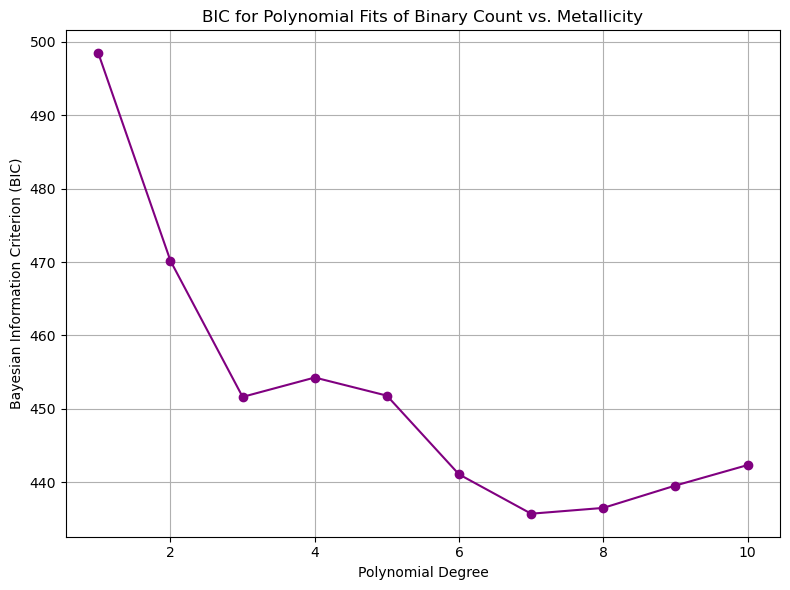

In [24]:
# Re-import necessary libraries after environment reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data arrays
zMa = np.array([0.0001, 0.0002, 0.00025, 0.0003, 0.0004, 0.0005, 0.0006, 0.00075,
                0.0008, 0.001, 0.002, 0.0025, 0.003, 0.004, 0.005, 0.006,
                0.007, 0.0075, 0.008, 0.009, 0.01, 0.017])
nibMZRMa = np.array([302607.35, 276062.45, 275622.73, 284437.89, 302072.55,
                     319014.68, 310668.06, 295608.33, 279162.48, 238061.08,
                     138772.13, 106782.94, 76063.38, 52825.30, 39808.75,
                     28813.55, 22608.60, 19967.18, 17619.14, 13825.43,
                     13985.56, 20317.68])

# Calculate BIC for polynomial degrees 1 to 10
degrees = range(1, 11)
n = len(zMa)
bics = []

for deg in degrees:
    coeffs = np.polyfit(zMa, nibMZRMa, deg=deg)
    poly = np.poly1d(coeffs)
    y_fit = poly(zMa)
    mse = mean_squared_error(nibMZRMa, y_fit)
    k = deg + 1  # number of parameters
    bic = n * np.log(mse) + k * np.log(n)
    bics.append(bic)

# Plot BIC vs. degree
plt.figure(figsize=(8, 6))
plt.plot(degrees, bics, marker='o', linestyle='-', color='purple')
plt.xlabel("Polynomial Degree")
plt.ylabel("Bayesian Information Criterion (BIC)")
plt.title("BIC for Polynomial Fits of Binary Count vs. Metallicity")
plt.grid(True)
plt.tight_layout()
plt.show()


While the Bayesian Information Criterion (BIC) analysis indicates a preferred polynomial degree of 7, the relatively high absolute BIC values—ranging between 400 and 500—suggest that a high-degree polynomial may not be the most appropriate model for capturing the underlying structure of the data. This motivates the consideration that the data may be better represented by a more sophisticated or physically motivated functional form.

As such, it would be valuable to explore more advanced regression techniques during the summer. Methods such as Gaussian Process Regression (GPR), spline fitting, kernel-based approaches, or even machine learning models may provide a more accurate and flexible framework for modeling the complex, nonlinear relationships evident in the simulated data. These techniques not only offer greater expressiveness but also the potential to incorporate prior physical knowledge and uncertainty quantification, both of which are critical for interpreting astrophysical simulations with rigor.

In [ ]:
#Step one: Create a volume

x= np.linespace(0,745,1) # 745 Mpc 
y=# give a negative linear relation 
y_err= # give some RANDOM spread
Y_Err= # give the mass error bars\


zMa = np.array([0.0001,0.0002,0.00025,.0003,.0004,.0005,.0006,.00075,.0008,.001,
                .002,0.0025,.003,.004,.005,.006,.007,.0075,.008,.009,.01,.017])

oneMgGal= # take the mass from the metallicity that the following runs were ran at


numbinPerGalZ= np.array([302607.35,276062.45,275622.73,284437.89,302072.55,319014.68,
                     310668.06,295608.33,279162.48,238061.08,138772.13,106782.94,
                     76063.38,52825.30,39808.75,28813.55,22608.60,19967.18,17619.14,
                     13825.43,13985.56,20317.68])





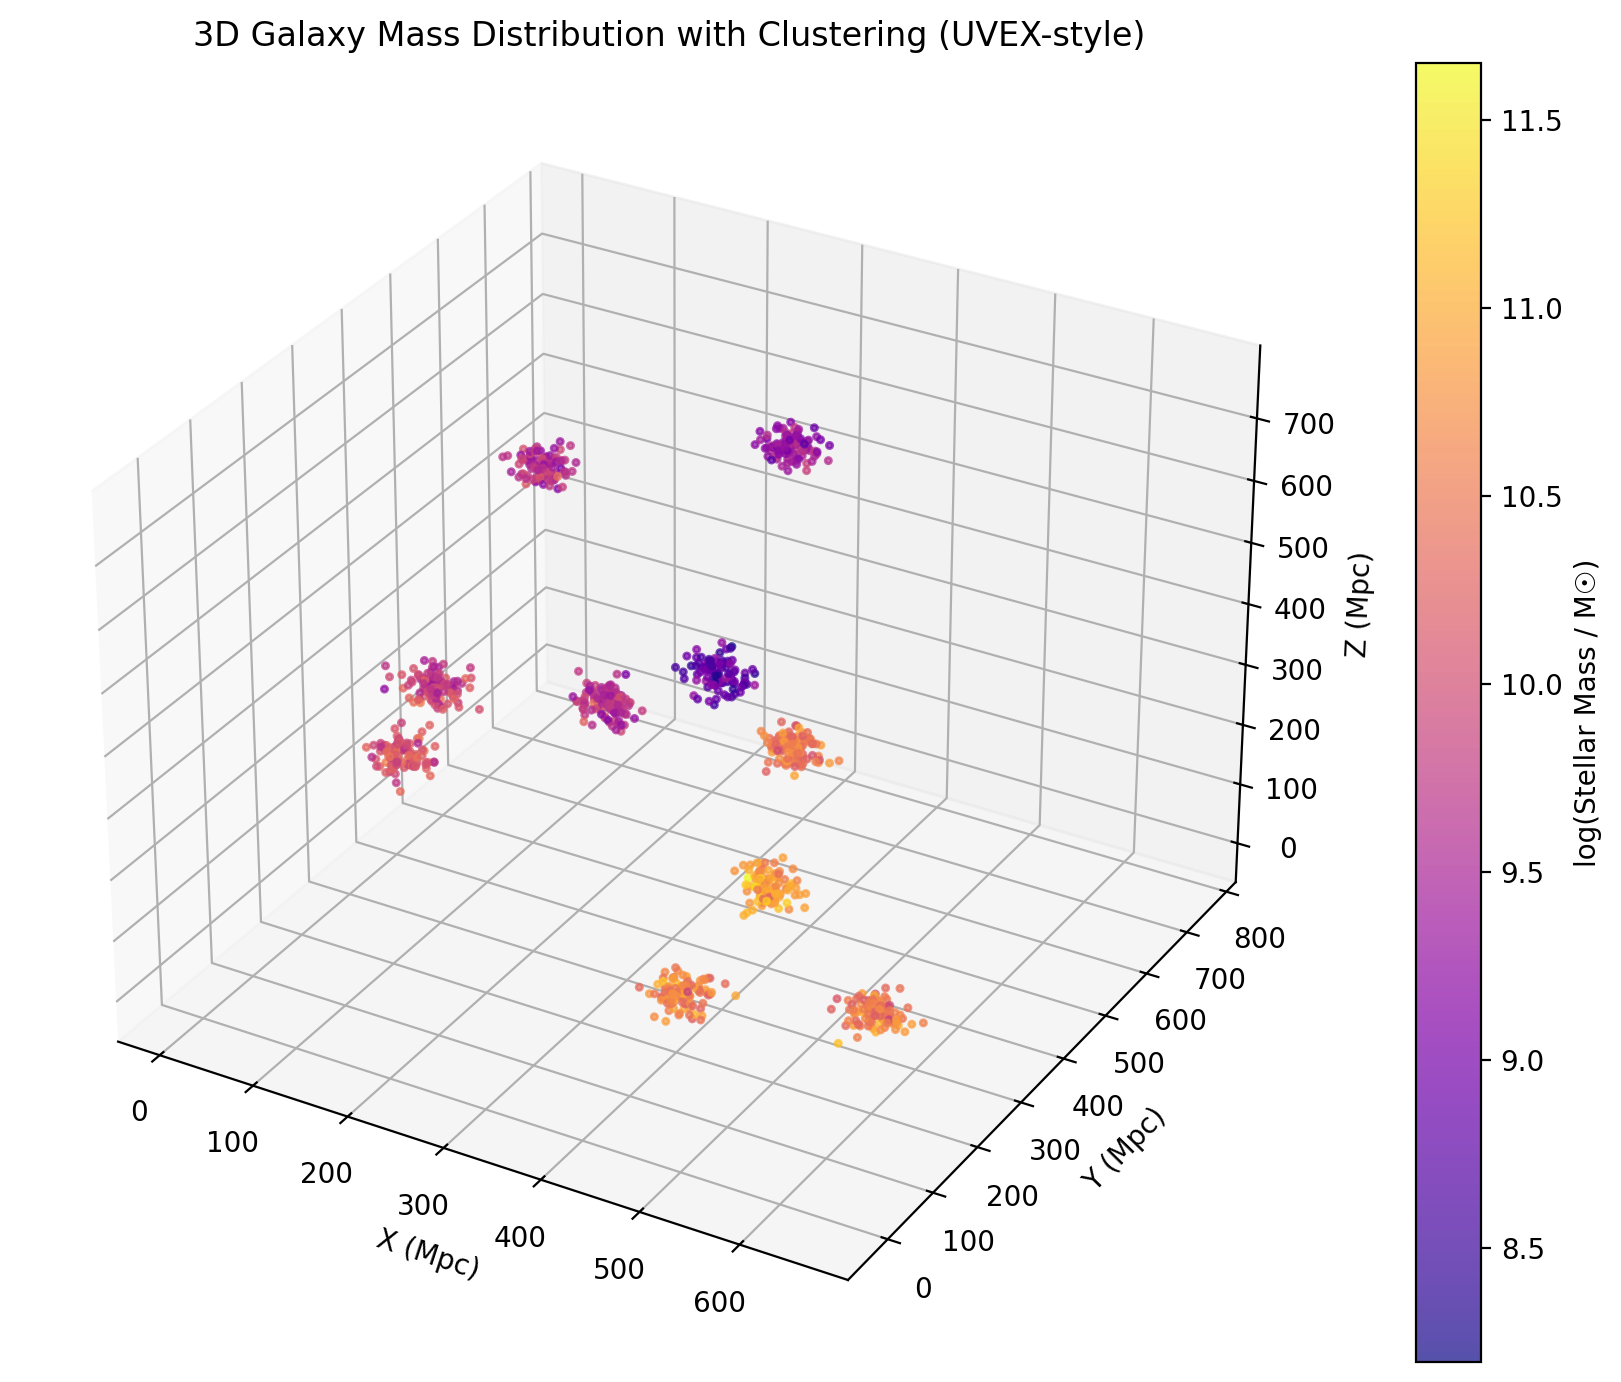

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
N_clusters = 10
galaxies_per_cluster = 100
total_galaxies = N_clusters * galaxies_per_cluster

# Volume size
volume_size = 745  # Mpc (assuming cubic for simplicity)

# Step 1: Create cluster centers
np.random.seed(42)
cluster_centers = np.random.uniform(0, volume_size, (N_clusters, 3))

# Step 2: Distribute galaxies around clusters with Gaussian spread
positions = []
for cx, cy, cz in cluster_centers:
    x = np.random.normal(cx, 15, galaxies_per_cluster)
    y = np.random.normal(cy, 15, galaxies_per_cluster)
    z = np.random.normal(cz, 15, galaxies_per_cluster)
    positions.append(np.stack((x, y, z), axis=1))

positions = np.vstack(positions)
x, y, z = positions[:, 0], positions[:, 1], positions[:, 2]

# Step 3: Assign mass (log scale) using a negative trend with z + scatter
a, b = 11, 0.003  # log mass = a - b*z
mass_log = a - b * z + np.random.normal(0, 0.25, total_galaxies)  # extra scatter
mass = 10 ** mass_log

# Step 4: Visualize the 3D density and mass trend
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=mass_log, cmap='plasma', s=5, alpha=0.7)
plt.colorbar(sc, label='log(Stellar Mass / M☉)')
ax.set_xlabel("X (Mpc)")
ax.set_ylabel("Y (Mpc)")
ax.set_zlabel("Z (Mpc)")
ax.set_title("3D Galaxy Mass Distribution with Clustering (UVEX-style)")
plt.tight_layout()
plt.show()


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
N_clusters = 10
galaxies_per_cluster = 100
N_low_mass = 3000  # many more low-mass galaxies
volume_size = 745  # Mpc

# Step 1: Clustered galaxies (same as before)
np.random.seed(42)
cluster_centers = np.random.uniform(0, volume_size, (N_clusters, 3))

cluster_positions = []
for cx, cy, cz in cluster_centers:
    x = np.random.normal(cx, 15, galaxies_per_cluster)
    y = np.random.normal(cy, 15, galaxies_per_cluster)
    z = np.random.normal(cz, 15, galaxies_per_cluster)
    cluster_positions.append(np.stack((x, y, z), axis=1))

cluster_positions = np.vstack(cluster_positions)
x_cl, y_cl, z_cl = cluster_positions[:, 0], cluster_positions[:, 1], cluster_positions[:, 2]

# Step 2: Field (low-mass) galaxies uniformly scattered
x_field = np.random.uniform(0, volume_size, N_low_mass)
y_field = np.random.uniform(0, volume_size, N_low_mass)
z_field = np.random.uniform(0, volume_size, N_low_mass)

# Step 3: Assign masses
# Cluster masses (same method as before)
a, b = 11, 0.003
mass_log_cl = a - b * z_cl + np.random.normal(0, 0.25, len(z_cl))
mass_cl = 10 ** mass_log_cl

# Low-mass field galaxies using Press-Schechter power law
alpha = -1.9
M_min = 1e7
M_max = 1e11
r = np.random.uniform(0, 1, N_low_mass)
mass_field = ((M_max**(alpha + 1) - M_min**(alpha + 1)) * r + M_min**(alpha + 1))**(1 / (alpha + 1))
mass_log_field = np.log10(mass_field)



# Combine all
x = np.concatenate([x_cl, x_field])
y = np.concatenate([y_cl, y_field])
z = np.concatenate([z_cl, z_field])
mass_log_all = np.concatenate([mass_log_cl, mass_log_field])
mass_all = 10 ** mass_log_all




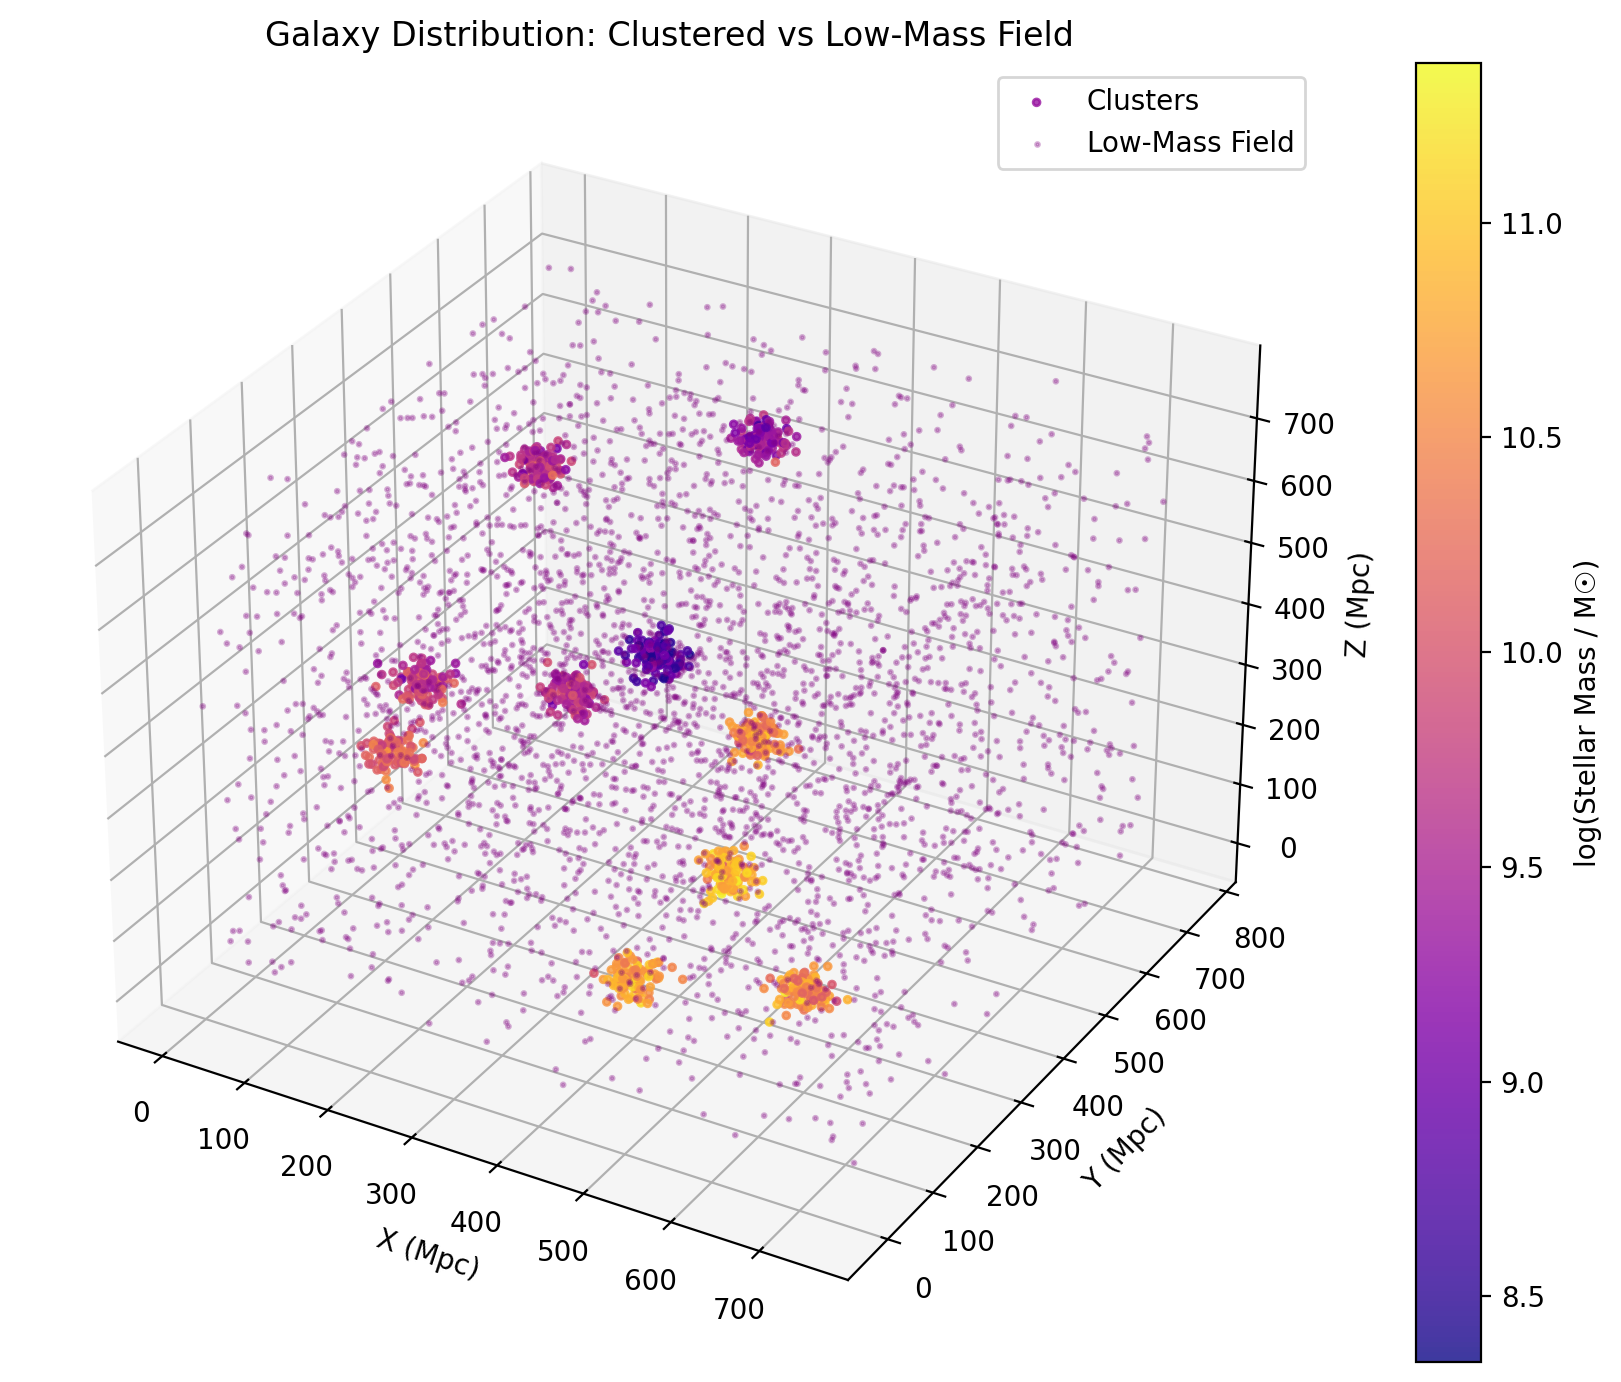

In [77]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Clustered galaxies — color by log mass
sc1 = ax.scatter(x_cl, y_cl, z_cl, c=mass_log_cl, cmap='plasma', s=6, alpha=0.8, label='Clusters')

# Field galaxies — small, purple
sc2 = ax.scatter(x_field, y_field, z_field, color='purple', s=2, alpha=0.3, label='Low-Mass Field')

# Add colorbar just for cluster galaxies
cbar = plt.colorbar(sc1, ax=ax)
cbar.set_label('log(Stellar Mass / M☉)')

# Labels and layout
ax.set_xlabel("X (Mpc)")
ax.set_ylabel("Y (Mpc)")
ax.set_zlabel("Z (Mpc)")
ax.set_title("Galaxy Distribution: Clustered vs Low-Mass Field")
ax.legend()
plt.tight_layout()
plt.show()


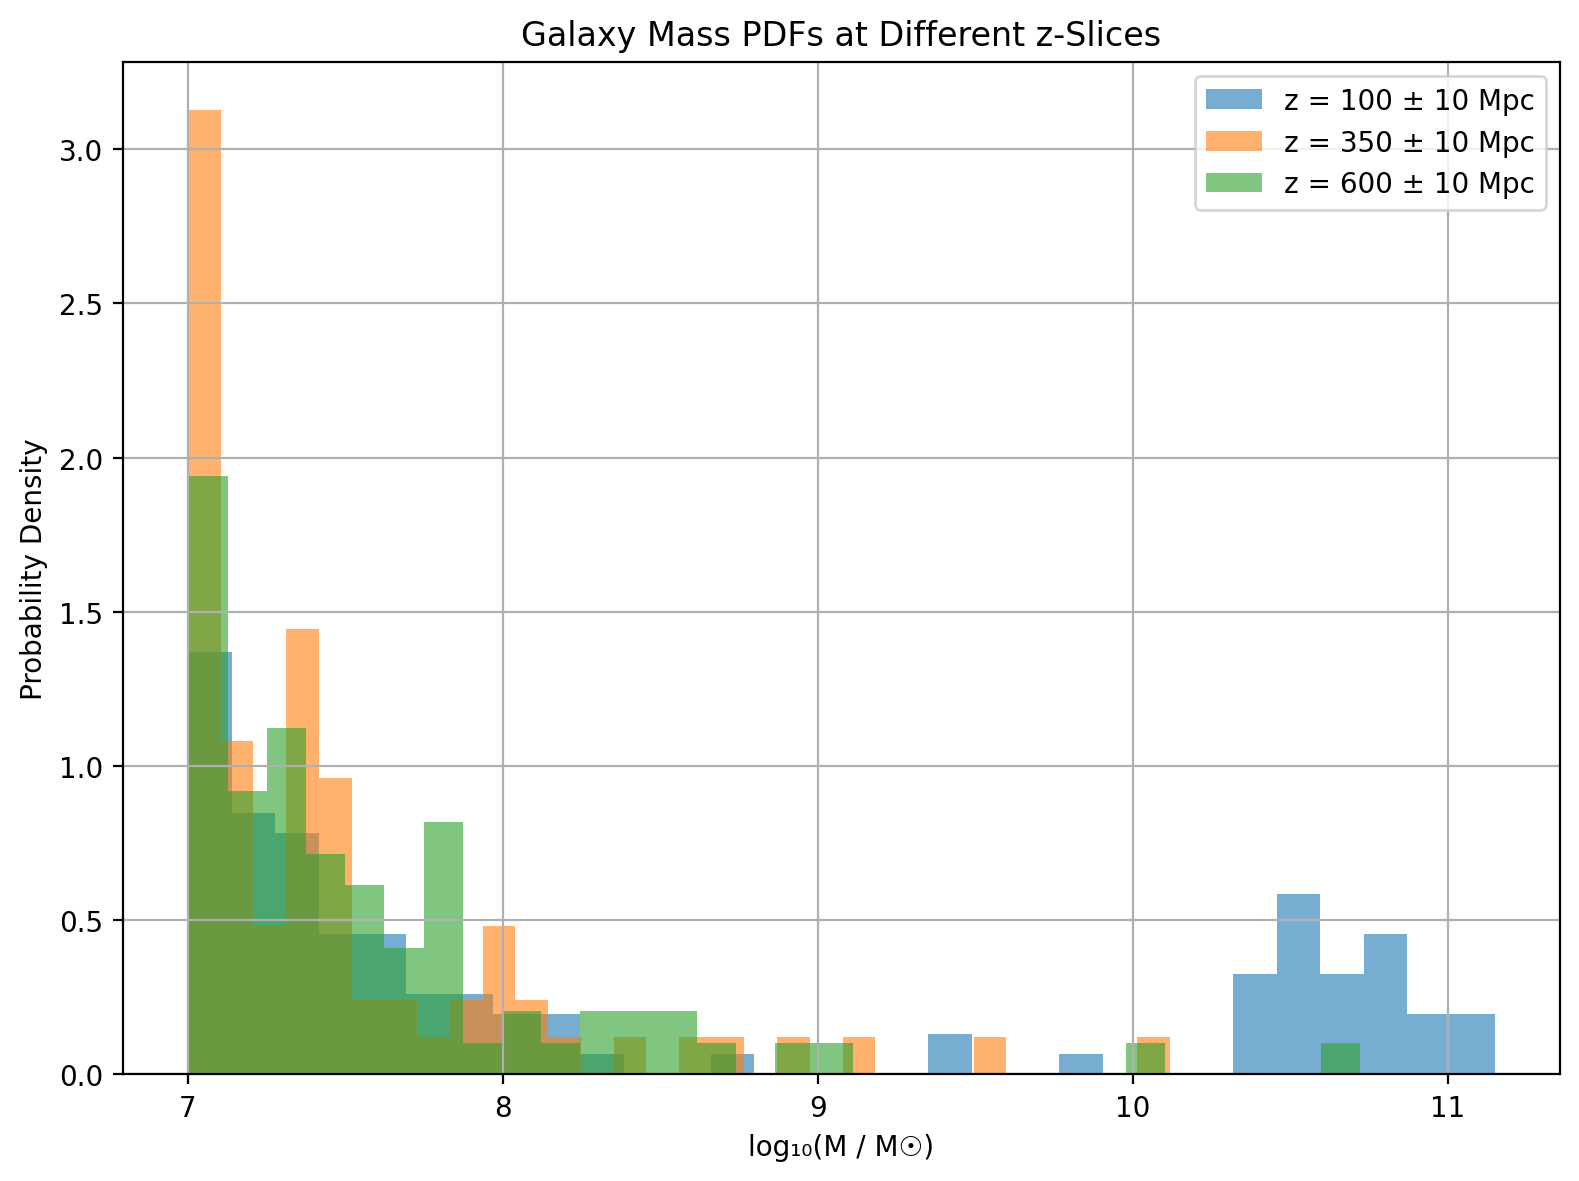

In [79]:
import matplotlib.pyplot as plt

# Define 3 z-slices and a thickness
z_slices = [100, 350, 600]
delta_z = 10

# Set up plot
fig, ax = plt.subplots(figsize=(8, 6))

for z0 in z_slices:
    # Select galaxies within ± delta_z of z0
    mask = (z >= z0 - delta_z) & (z <= z0 + delta_z)
    selected_log_masses = mass_log_all[mask]

    # Plot PDF (normalized histogram)
    ax.hist(
        selected_log_masses, 
        bins=30, 
        density=True, 
        alpha=0.6, 
        label=f'z = {z0} ± {delta_z} Mpc'
    )

ax.set_xlabel('log₁₀(M / M☉)')
ax.set_ylabel('Probability Density')
ax.set_title('Galaxy Mass PDFs at Different z-Slices')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

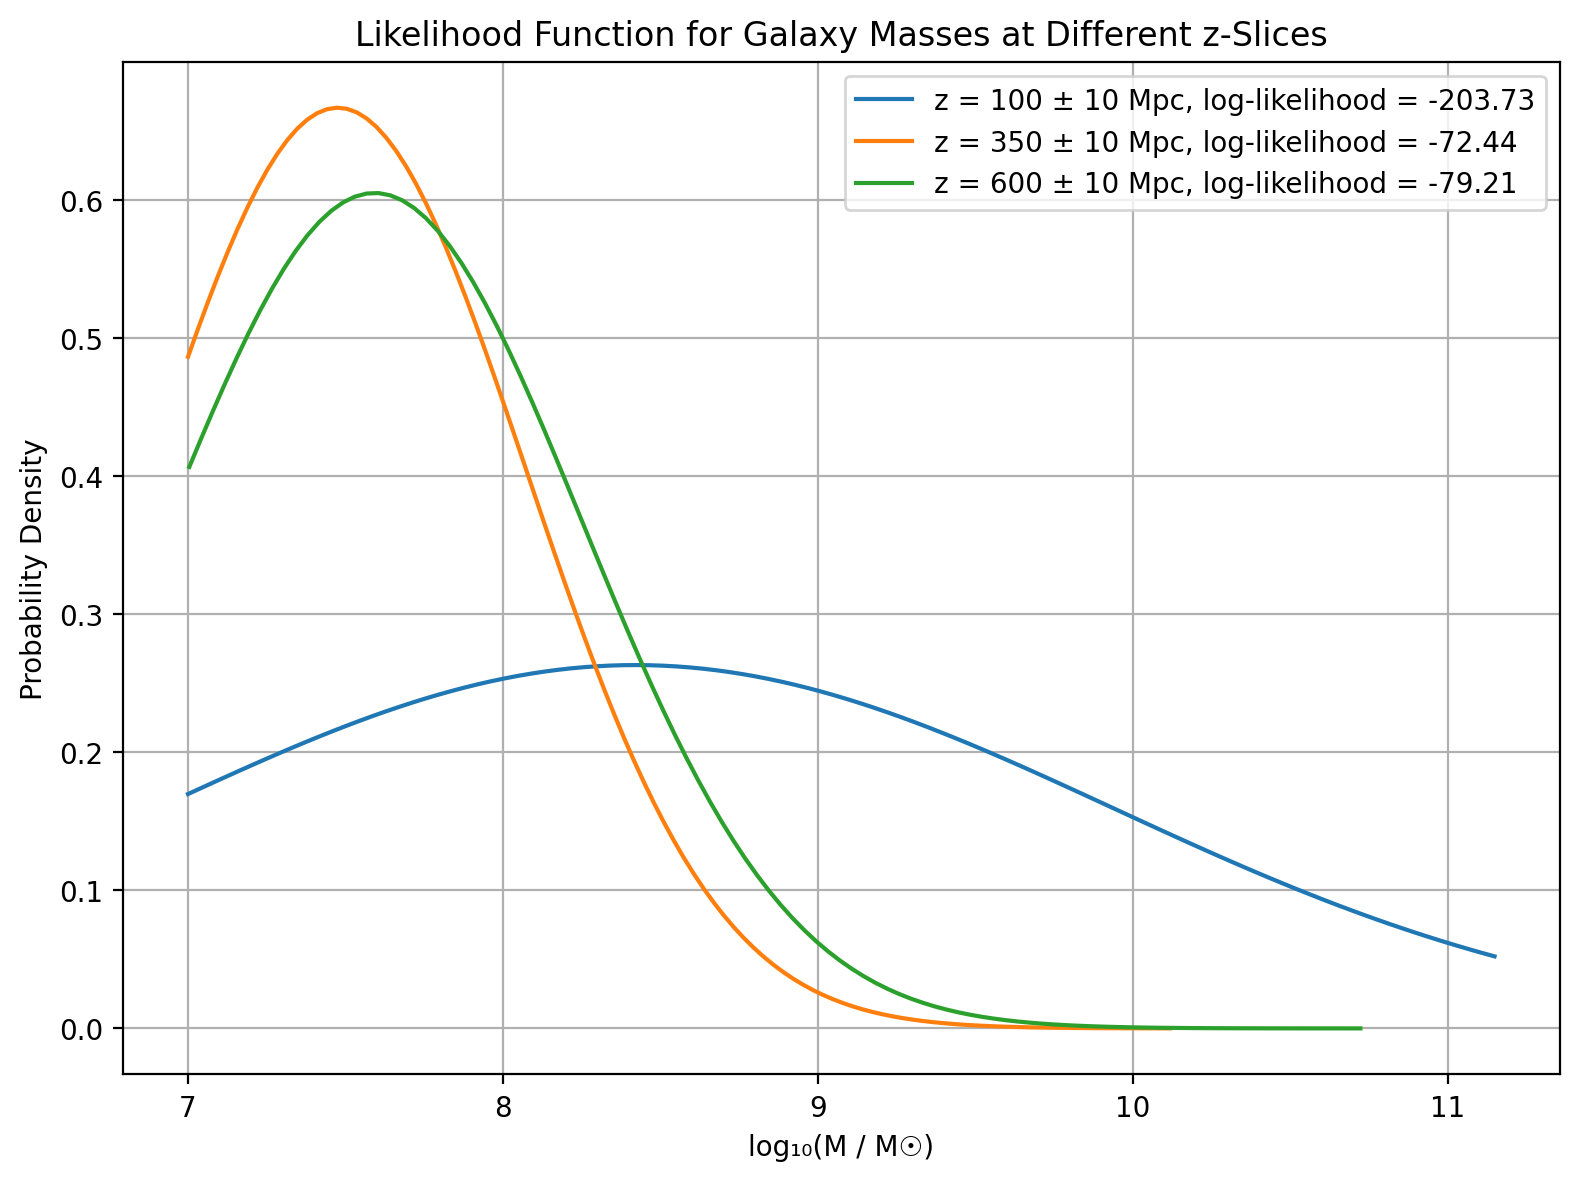

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define 3 z-slices and thickness
z_slices = [100, 350, 600]
delta_z = 10

# Set up plot for likelihood
fig, ax = plt.subplots(figsize=(8, 6))

for z0 in z_slices:
    # Select galaxies within ± delta_z of z0
    mask = (z >= z0 - delta_z) & (z <= z0 + delta_z)
    selected_log_masses = mass_log_all[mask]

    # Calculate mean and standard deviation for log masses in the slice
    mu = np.mean(selected_log_masses)
    sigma = np.std(selected_log_masses)
    
    # Compute the likelihood (using log-likelihood)
    log_likelihood = np.sum(np.log(norm.pdf(selected_log_masses, mu, sigma)))
    
    # Plot the Gaussian PDF for the selected masses
    x_vals = np.linspace(min(selected_log_masses), max(selected_log_masses), 100)
    pdf_vals = norm.pdf(x_vals, mu, sigma)
    ax.plot(x_vals, pdf_vals, label=f'z = {z0} ± {delta_z} Mpc, log-likelihood = {log_likelihood:.2f}')
    
ax.set_xlabel('log₁₀(M / M☉)')
ax.set_ylabel('Probability Density')
ax.set_title('Likelihood Function for Galaxy Masses at Different z-Slices')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#note 

This is amazing. Note that there is no physical value of redshift yet. I would need to figure out the physical convolving units, as Einstein's general relativity theory informs. Let's just imagine that a high redshift indicates a larger, more massive volume of the universe (so low z).

Now we can be very very boring, end the experiment by applying our prior  by our likelyhood function to get a statistical probability of the number of binaries that UVEX will detect. The project would be finished. some amazing science has been done. However i feel like that is not something a graduate student would end at. SO LETS GET INTO VISUALIZING THIS BITCH(Harrision has been a terrible influence.)

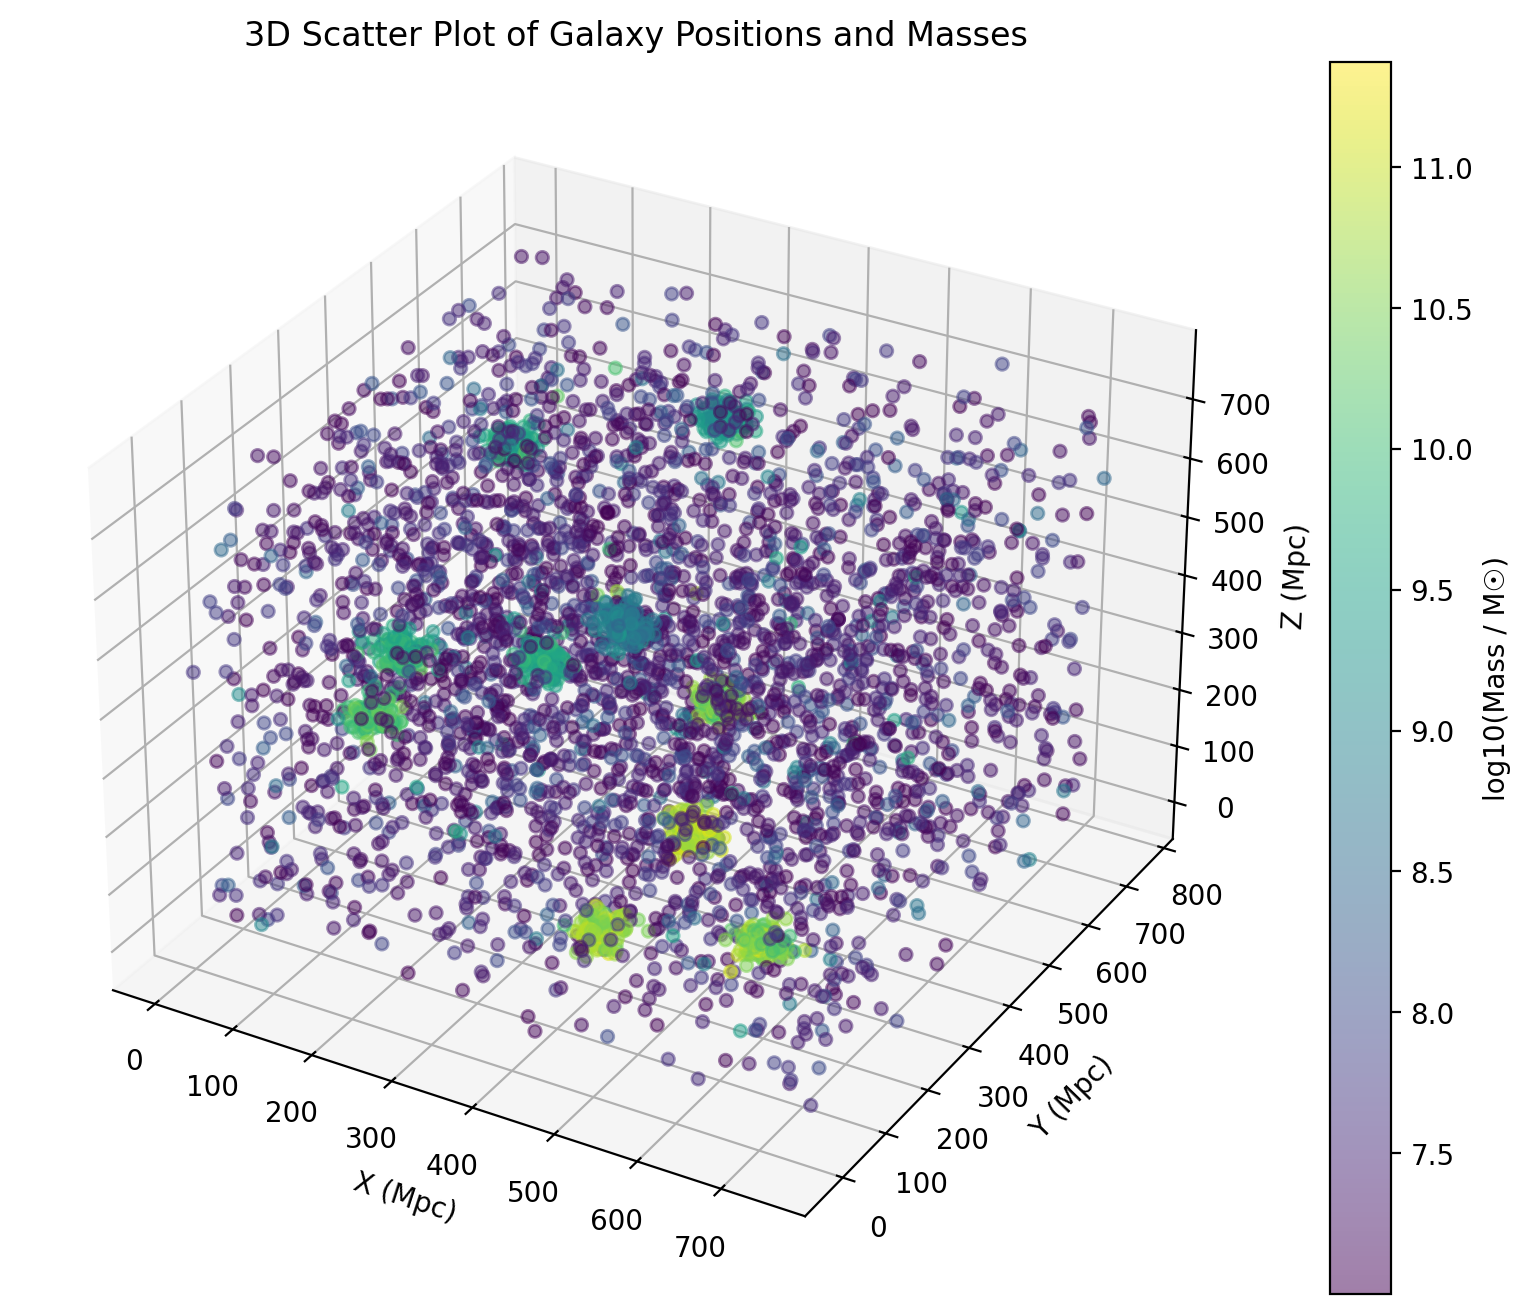

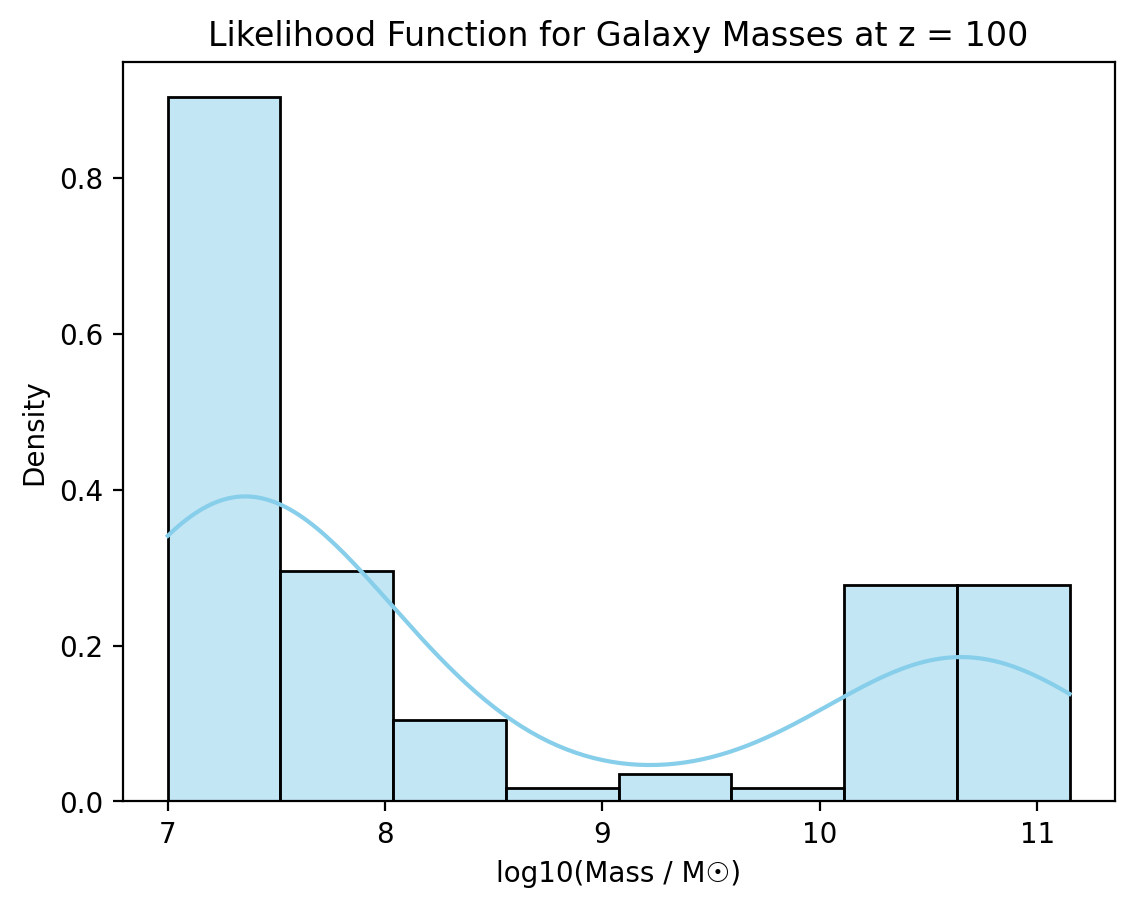

"\n# Binary system predictions: bar plot based on mass ranges\nmass_ranges = [1e7, 1e9, 1e10, 1e11]\nbinary_counts = np.histogram(mass_all, bins=mass_ranges)[0]\n\nplt.bar(range(len(binary_counts)), binary_counts, tick_label=['<1e9', '1e9-1e10', '1e10-1e11', '>1e11'])\nplt.title('Predicted Number of Binary Systems by Mass Range')\nplt.xlabel('Mass Range (M☉)')\nplt.ylabel('Number of Binaries')\n#plt.show()\n"

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# 3D scatter plot of galaxy positions (mass determined by color)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot cluster galaxies with color based on mass
scatter = ax.scatter(x, y, z, c=mass_log_all, cmap='viridis', alpha=0.5, marker='o')

# Add colorbar for mass values
fig.colorbar(scatter, ax=ax, label='log10(Mass / M☉)')

ax.set_xlabel('X (Mpc)')
ax.set_ylabel('Y (Mpc)')
ax.set_zlabel('Z (Mpc)')
ax.set_title('3D Scatter Plot of Galaxy Positions and Masses')

plt.show()

# Heatmap of likelihood function for a slice in z
z_slice = 100  # example z-slice
mask = (z >= z_slice - delta_z) & (z <= z_slice + delta_z)
selected_log_masses = mass_log_all[mask]
sns.histplot(selected_log_masses, kde=True, color='skyblue', stat="density")
plt.title(f'Likelihood Function for Galaxy Masses at z = {z_slice}')
plt.xlabel('log10(Mass / M☉)')
plt.ylabel('Density')
plt.show()
'''
# Binary system predictions: bar plot based on mass ranges
mass_ranges = [1e7, 1e9, 1e10, 1e11]
binary_counts = np.histogram(mass_all, bins=mass_ranges)[0]

plt.bar(range(len(binary_counts)), binary_counts, tick_label=['<1e9', '1e9-1e10', '1e10-1e11', '>1e11'])
plt.title('Predicted Number of Binary Systems by Mass Range')
plt.xlabel('Mass Range (M☉)')
plt.ylabel('Number of Binaries')
#plt.show()
'''

Why the Low-Redshift Slice Stands Out:

Higher Density & Mass Diversity:
The z-slice likely intersects a cluster or overdense region, resulting in a broader range of galaxy masses. This gives UVEX a richer sample to observe and provides the most opportunity for extracting scientific insight.
Science Potential & Machine Learning Prep:
This slice is ideal for simulating the kind of environments UVEX will explore, helping us better understand mass-density detectability. It also gives us valuable data to begin building intuition for future machine learning models that will process UVEX observations.

If time permitted, I would extend this analysis by applying my cosmic simulation results — specifically, the number of interacting binaries as a function of redshift — to datasets like this one. Given that this slice exhibits the broadest mass distribution, it would be the most representative region for testing how binary populations evolve and how UVEX might detect them across cosmic time


In [88]:
# GRB parameters
grb_rate_per_day = 1  # 1 GRB per day
detection_prob = 0.30  # 30% of those are detectable

# Simulate a Monte Carlo chain for GRB detection
n_grbs_simulated = len(x)  # number of galaxies
grb_detection = np.random.rand(n_grbs_simulated) < detection_prob  # Monte Carlo detection process

In [90]:
# GRB probability scales with mass: higher mass, higher chance of detecting a GRB
grb_prob_mass = mass_all / np.max(mass_all)  # Normalize mass to probability
grb_detection_mass = np.random.rand(n_grbs_simulated) < grb_prob_mass  # Monte Carlo detection based on mass

In [112]:
# First, we calculate the GRB detection density as a function of position and mass
# Map the GRB detections to the 2D space of galaxy positions (x, y) and mass
grb_positions = np.vstack((x, y, z))  # Positions of galaxies

# Create a grid of positions
grid_size = 100  # Define grid size for 2D plot
x_grid = np.linspace(0, volume_size, grid_size)
y_grid = np.linspace(0, volume_size, grid_size)

# Generate a 2D density grid for detected GRBs using a kernel density estimate (KDE)
from scipy.stats import gaussian_kde

kde = gaussian_kde(grb_positions.T, weights=grb_detection.astype(int), bw_method='silverman')
X, Y = np.meshgrid(x_grid, y_grid)
Z = kde(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape)


ValueError: `weights` input should be of length n

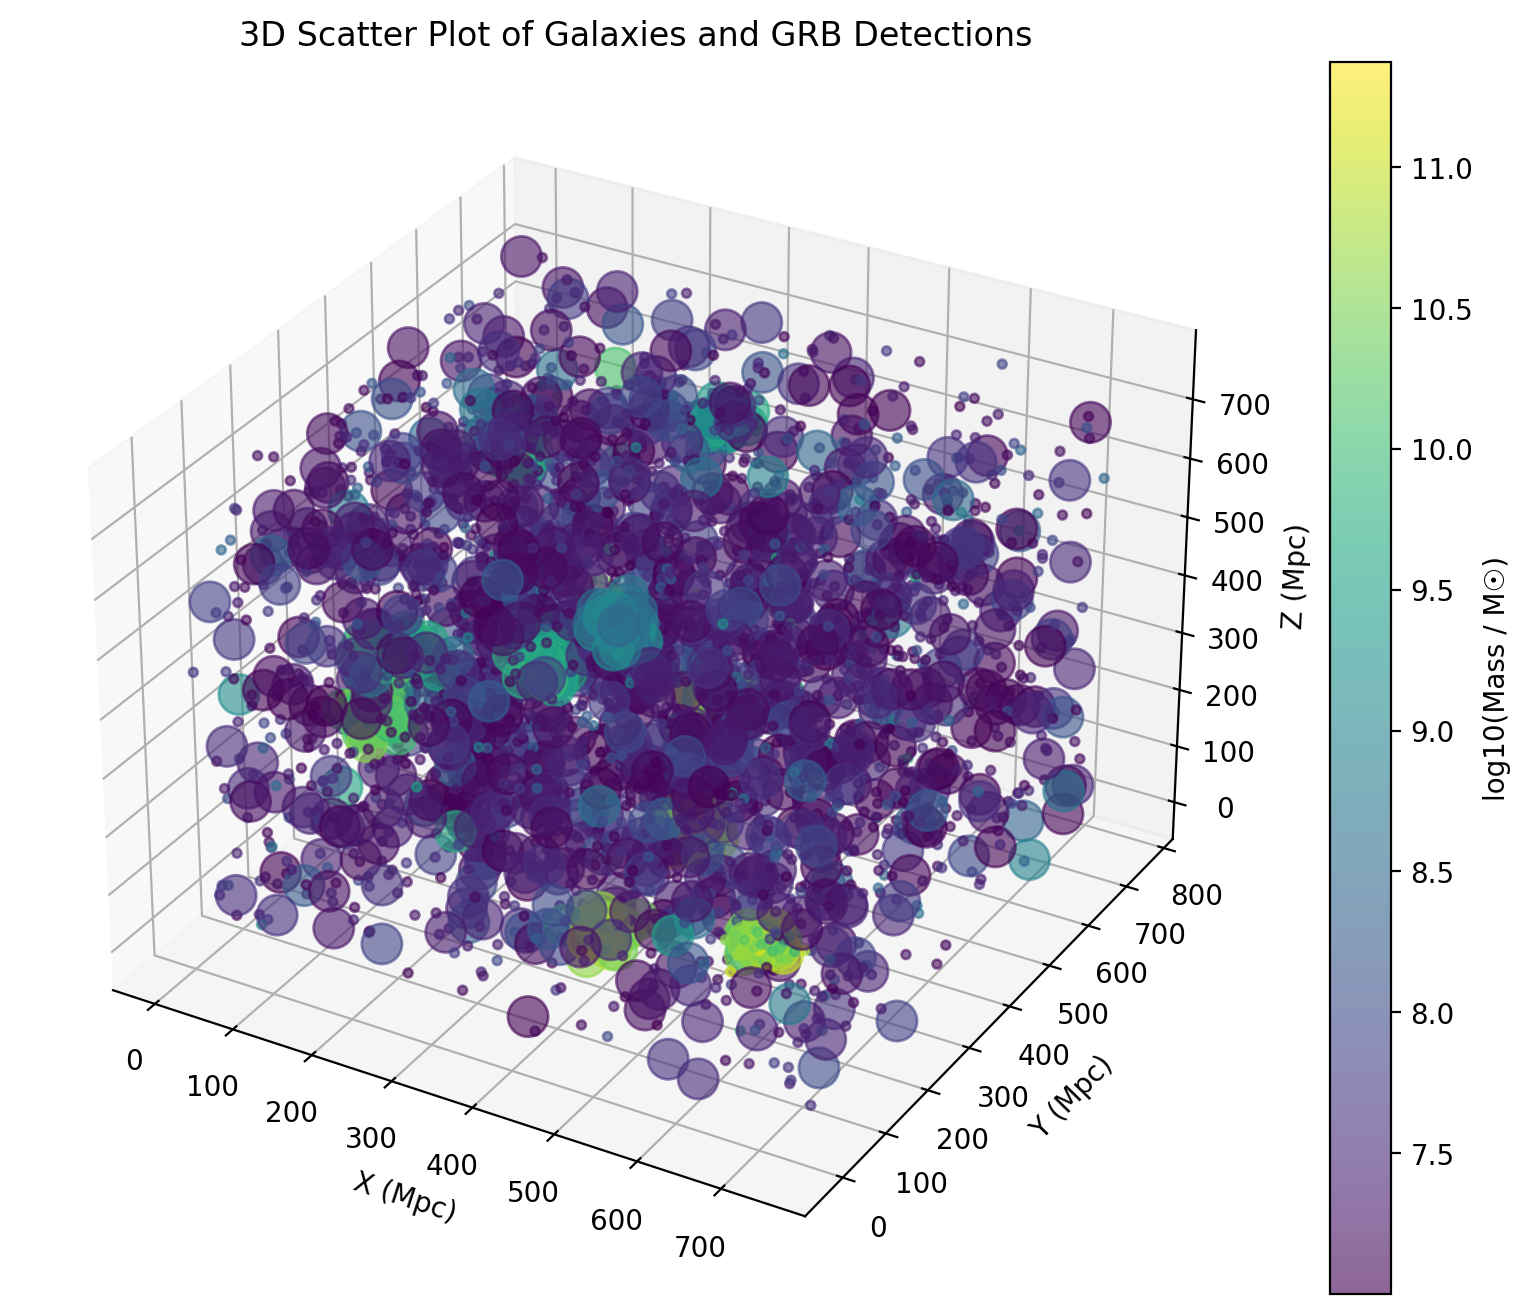

In [94]:
# 3D scatter plot of galaxies with mass and GRB detection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for galaxy positions with mass as color and GRB detection as size
scatter = ax.scatter(x, y, z, c=mass_log_all, cmap='viridis', s=10 + 200 * grb_detection, alpha=0.6)

# Add colorbar for mass
fig.colorbar(scatter, ax=ax, label='log10(Mass / M☉)')

ax.set_xlabel('X (Mpc)')
ax.set_ylabel('Y (Mpc)')
ax.set_zlabel('Z (Mpc)')
ax.set_title('3D Scatter Plot of Galaxies and GRB Detections')

plt.show()


In [145]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
volume_size = 1  # Mpc
N_clusters = 10
galaxies_per_cluster = 100
N_low_mass = 500  # fewer due to smaller volume
alpha = -1.9
M_min = 1e7
M_max = 1e11
daily_grb_rate = 1
uvex_detection_efficiency = 0.3
# another thing i could do is machine parameter =maximizaiton... cause obviously we can learnmore from the data
# --- Step 1: Clustered galaxies ---
np.random.seed(42)
cluster_centers = np.random.uniform(0, volume_size, (N_clusters, 3))#array with 10 rows(cluster centers) with each of the rows 
#highlighting the 3d coordinates (x,y,z)


#assigning clusters their 3d space where we will define the galaxy mass/metallicity
cluster_positions = []
for cx, cy, cz in cluster_centers:
    x = np.random.normal(cx, 0.05, galaxies_per_cluster)
    y = np.random.normal(cy, 0.05, galaxies_per_cluster)
    z = np.random.normal(cz, 0.05, galaxies_per_cluster)
    cluster_positions.append(np.stack((x, y, z), axis=1))

cluster_positions = np.vstack(cluster_positions)
x_cl, y_cl, z_cl = cluster_positions[:, 0], cluster_positions[:, 1], cluster_positions[:, 2]
#alc comment commpleted 

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041]]


In [104]:
#need to figure out how to convolve th

print(x[grb_host_indices], y[grb_host_indices], z[grb_host_indices])

[ 0.42331738  0.01919278  0.48016329  0.79225891  0.38597579  0.52630054
  0.94296879  0.00860337  0.10366936  0.48768589  0.51228765  0.30136437
  0.41525404  0.142025    0.48768589  0.61479441  0.13950538  0.51830396
  0.76395249  0.85926813  0.36281076 -0.04601286  0.67347717  0.50394147
  0.05324796  0.86784807  0.39146484  0.5189371   0.85617755  0.13433112
  0.44212184  0.42551814  0.43062473  0.67529543  0.50539573  0.6235584
  0.16892152  0.04260629  0.47401865  0.38597579  0.19650131  0.11441186
  0.83624291  0.44360583  0.02890077  0.64741447  0.4540744   0.46483056
  0.03194746  0.47078119  0.20908452  0.88027776  0.67986865  0.06525789
  0.14458668  0.76395249  0.43993784  0.43909217  0.40090264  0.36355652
  0.4553781   0.81698682  0.00403045  0.04094923  0.8338517   0.34510497
  0.75430426  0.20357605  0.63824162  0.81792891  0.5326711   0.02890077
  0.04510404  0.83566636  0.02244132  0.76395249  0.10639475  0.068296
  0.05086559  0.59288542  0.15926733  0.7110541   0.73